In [19]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model.base import MultiOutputMixin
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [20]:
def load_data(): 
    return pd.read_csv("./BreastCancer.csv",index_col=False)

In [21]:
scaler = StandardScaler()
def standardize_(ft):
    return scaler.fit_transform(ft)
def preprocessing_data(dt):
    features =  dt.drop(columns=["id","Unnamed: 32"])
    features =features.drop(columns=["diagnosis"])
    dt["diagnosis"].replace(['M', 'B'], [1, 0], inplace=True)
    labels = dt["diagnosis"]
    return features, labels

In [22]:
data = load_data()
features , labels = preprocessing_data(data)
features_std = standardize_(features)
x_train, x_test, y_train, y_test = train_test_split( features_std, labels, test_size=0.25, random_state=42)

In [23]:
y_train.value_counts(normalize=True)

0    0.629108
1    0.370892
Name: diagnosis, dtype: float64

In [24]:
sm=SMOTE()
def tuned_model(clf,params,smote=False):
    model =GridSearchCV(clf,params,scoring="f1",n_jobs=1,cv=5)
    if smote:
        x, y=sm.fit_resample(x_train,y_train)

    else:
        x,y = x_train, y_train
    model.fit(x,y)
    print(cross_val_score(model,x,y,scoring="f1",cv=5))
    print(model.best_score_)
    model_best_params=model.best_params_
    print(model_best_params)
    y_pred = model.best_estimator_.predict(x_test)
    cm= confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    print("Prcecision,Recall, F1 =",precision_recall_fscore_support(y_test, y_pred,average="binary")[0:3])
    return model_best_params,(precision_recall_fscore_support(y_test, y_pred,average="binary"))


[0.98461538 0.94915254 0.98360656 0.92063492 0.96875   ]
0.9709972677595629
{'C': 10, 'penalty': 'l2'}
Prcecision,Recall, F1 = (0.9464285714285714, 0.9814814814814815, 0.9636363636363636)
[0.98148148 0.96296296 0.98076923 1.         0.98181818]
0.9832063021782649
{'C': 1, 'penalty': 'l2'}
Prcecision,Recall, F1 = (0.9464285714285714, 0.9814814814814815, 0.9636363636363636)


({'C': 1, 'penalty': 'l2'},
 (0.9464285714285714, 0.9814814814814815, 0.9636363636363636, None))

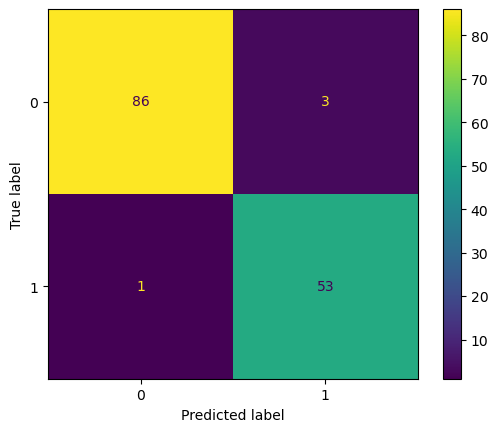

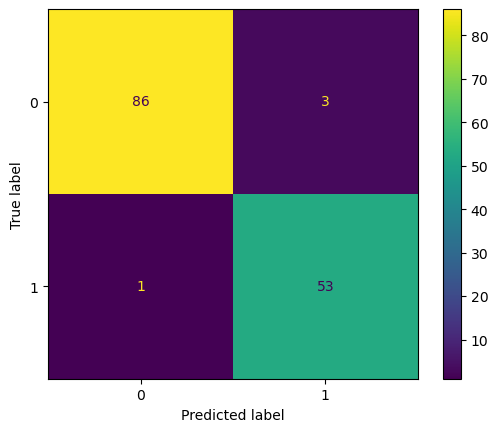

In [8]:
params_lr= {'C':[0.001, 0.1, 1, 10, 100],'penalty':['l1','l2']}
model_lr = LogisticRegression(solver="liblinear")
tuned_model(model_lr,params_lr)
tuned_model(model_lr,params_lr,smote=True)

[0.95384615 0.95238095 0.98360656 0.96774194 0.95384615]
0.9677925147390679
{'C': 0.1, 'kernel': 'linear'}
Prcecision,Recall, F1 = (0.9811320754716981, 0.9629629629629629, 0.9719626168224299)
[0.97196262 0.98148148 0.93069307 1.         0.98181818]
0.9810847631635218
{'C': 0.1, 'kernel': 'linear'}
Prcecision,Recall, F1 = (0.9811320754716981, 0.9629629629629629, 0.9719626168224299)


({'C': 0.1, 'kernel': 'linear'},
 (0.9811320754716981, 0.9629629629629629, 0.9719626168224299, None))

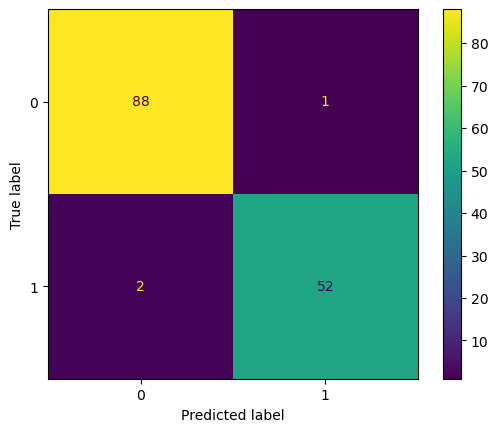

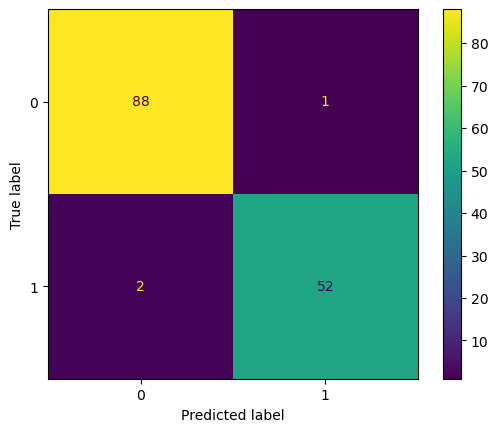

In [17]:
svm_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
model_svm = SVC()
tuned_model(model_svm,svm_params)
tuned_model(model_svm,svm_params,smote=True)

[0.93333333 0.8852459  0.86956522 0.90625    0.90625   ]
0.9114726732637181
{'criterion': 'entropy', 'max_depth': 10}
Prcecision,Recall, F1 = (0.9433962264150944, 0.9259259259259259, 0.9345794392523364)
[0.95412844 0.92727273 0.92156863 0.98181818 0.95327103]
0.9666229794670163
{'criterion': 'entropy', 'max_depth': 100}
Prcecision,Recall, F1 = (0.8793103448275862, 0.9444444444444444, 0.9107142857142858)


({'criterion': 'entropy', 'max_depth': 100},
 (0.8793103448275862, 0.9444444444444444, 0.9107142857142858, None))

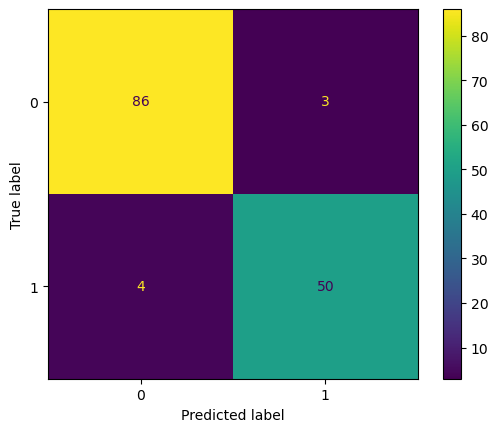

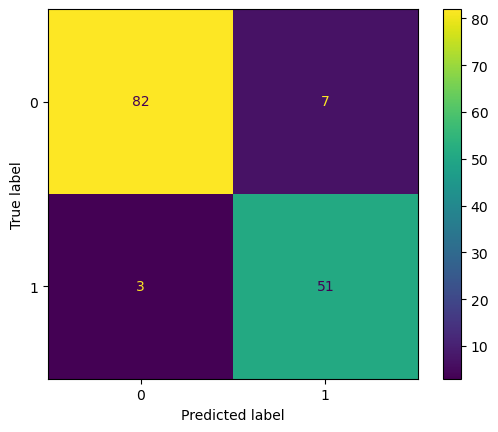

In [16]:
import warnings
warnings.filterwarnings("ignore")
params_dt = {'criterion':['entropy','gini','log_loss'], 'max_depth':[10, 50, 100]}
model_dt = DecisionTreeClassifier()
tuned_model(model_dt,params_dt)
tuned_model(model_dt,params_dt,smote=True)

[0.96774194 0.93548387 0.98412698 0.90322581 0.92063492]
0.9522643664579148
{'criterion': 'entropy', 'n_estimators': 100}
Prcecision,Recall, F1 = (0.9807692307692307, 0.9444444444444444, 0.9622641509433962)
[0.96296296 0.95327103 0.96153846 0.97247706 0.98181818]
0.9719923759176096
{'criterion': 'entropy', 'n_estimators': 50}
Prcecision,Recall, F1 = (0.9807692307692307, 0.9444444444444444, 0.9622641509433962)


({'criterion': 'entropy', 'n_estimators': 50},
 (0.9807692307692307, 0.9444444444444444, 0.9622641509433962, None))

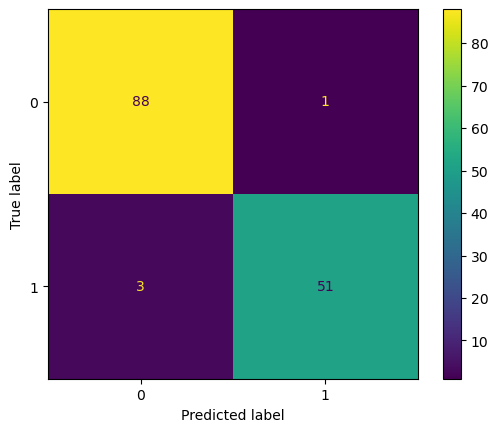

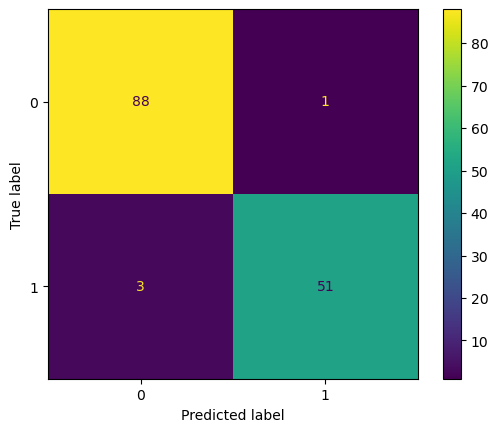

In [14]:
import warnings
warnings.filterwarnings("ignore")
params_rf = {'n_estimators':[10,50,100],'criterion':['entropy','gini']}
model_rf = RandomForestClassifier()
tuned_model(model_rf,params_rf)
tuned_model(model_rf,params_rf,smote=True)

In [25]:

import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [26]:
def ann(u,d,e,b):
    model = Sequential()
    model.add(Dense(u, activation='relu', input_shape=(30,)))
    model.add(Dropout(d))
    model.add(Dense(u, activation='relu'))
    model.add(Dropout(d))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['acc'])
    model.fit(x_train, y_train,epochs=e, batch_size=b, verbose=1)
    return model

In [27]:
params_ann={'u':[16,8,4],'d':[0.1,0.2],'e':[8,16],'b':[1,2,4]}

Epoch 1/8
  1/426 [..............................] - ETA: 1:10 - loss: 0.0185 - acc: 1.0000

2023-01-05 13:55:54.663642: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


426/426 [==============================] - 0s 321us/step - loss: 0.4018 - acc: 0.8427
Epoch 2/8
426/426 [==============================] - 0s 297us/step - loss: 0.1984 - acc: 0.9296
Epoch 3/8
426/426 [==============================] - 0s 298us/step - loss: 0.1505 - acc: 0.9507
Epoch 4/8
426/426 [==============================] - 0s 300us/step - loss: 0.1048 - acc: 0.9742
Epoch 5/8
426/426 [==============================] - 0s 297us/step - loss: 0.0871 - acc: 0.9765
Epoch 6/8
426/426 [==============================] - 0s 296us/step - loss: 0.0831 - acc: 0.9765
Epoch 7/8
426/426 [==============================] - 0s 323us/step - loss: 0.0775 - acc: 0.9789
Epoch 8/8
3/3 [==============================] - 0s 548us/step
Epoch 1/8


2023-01-05 13:55:56.066844: W tensorflow/core/common_runtime/forward_type_inference.cc:231] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_BOOL
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_LEGACY_VARIANT
    }
  }
}

	while inferring type of node 'binary_crossentropy/cond/output/_10'


426/426 [==============================] - 0s 322us/step - loss: 0.3100 - acc: 0.8850
Epoch 2/8
426/426 [==============================] - 0s 318us/step - loss: 0.1322 - acc: 0.9577
Epoch 3/8
426/426 [==============================] - 0s 316us/step - loss: 0.1012 - acc: 0.9765
Epoch 4/8
426/426 [==============================] - 0s 315us/step - loss: 0.0914 - acc: 0.9718
Epoch 5/8
426/426 [==============================] - 0s 311us/step - loss: 0.0809 - acc: 0.9765
Epoch 6/8
426/426 [==============================] - 0s 311us/step - loss: 0.0707 - acc: 0.9765
Epoch 7/8
426/426 [==============================] - 0s 308us/step - loss: 0.0580 - acc: 0.9812
Epoch 8/8
3/3 [==============================] - 0s 552us/step
Epoch 1/8
426/426 [==============================] - 0s 322us/step - loss: 0.4719 - acc: 0.8075
Epoch 2/8
426/426 [==============================] - 0s 299us/step - loss: 0.1604 - acc: 0.9601
Epoch 3/8
426/426 [==============================] - 0s 312us/step - loss: 0.1070 -

426/426 [==============================] - 0s 306us/step - loss: 0.0720 - acc: 0.9765
Epoch 7/16
426/426 [==============================] - 0s 307us/step - loss: 0.0598 - acc: 0.9765
Epoch 8/16
426/426 [==============================] - 0s 309us/step - loss: 0.0525 - acc: 0.9883
Epoch 9/16
426/426 [==============================] - 0s 307us/step - loss: 0.0598 - acc: 0.9789
Epoch 10/16
426/426 [==============================] - 0s 321us/step - loss: 0.0602 - acc: 0.9836
Epoch 11/16
426/426 [==============================] - 0s 327us/step - loss: 0.0529 - acc: 0.9859
Epoch 12/16
426/426 [==============================] - 0s 333us/step - loss: 0.0414 - acc: 0.9883
Epoch 13/16
426/426 [==============================] - 0s 309us/step - loss: 0.0475 - acc: 0.9859
Epoch 14/16
426/426 [==============================] - 0s 306us/step - loss: 0.0365 - acc: 0.9930
Epoch 15/16
426/426 [==============================] - 0s 299us/step - loss: 0.0421 - acc: 0.9906
Epoch 16/16
3/3 [==================

3/3 [==============================] - 0s 557us/step
Epoch 1/16
426/426 [==============================] - 0s 318us/step - loss: 0.4577 - acc: 0.7840
Epoch 2/16
426/426 [==============================] - 0s 293us/step - loss: 0.2461 - acc: 0.8920
Epoch 3/16
426/426 [==============================] - 0s 293us/step - loss: 0.1842 - acc: 0.9061
Epoch 4/16
426/426 [==============================] - 0s 312us/step - loss: 0.1572 - acc: 0.9296
Epoch 5/16
426/426 [==============================] - 0s 309us/step - loss: 0.1521 - acc: 0.9343
Epoch 6/16
426/426 [==============================] - 0s 302us/step - loss: 0.1647 - acc: 0.9225
Epoch 7/16
426/426 [==============================] - 0s 298us/step - loss: 0.1359 - acc: 0.9460
Epoch 8/16
426/426 [==============================] - 0s 305us/step - loss: 0.1311 - acc: 0.9624
Epoch 9/16
426/426 [==============================] - 0s 298us/step - loss: 0.1407 - acc: 0.9484
Epoch 10/16
426/426 [==============================] - 0s 307us/step - los

426/426 [==============================] - 0s 300us/step - loss: 0.1975 - acc: 0.9249
Epoch 5/8
426/426 [==============================] - 0s 296us/step - loss: 0.1793 - acc: 0.9390
Epoch 6/8
426/426 [==============================] - 0s 304us/step - loss: 0.1543 - acc: 0.9507
Epoch 7/8
426/426 [==============================] - 0s 295us/step - loss: 0.1310 - acc: 0.9484
Epoch 8/8
3/3 [==============================] - 0s 622us/step
Epoch 1/8
426/426 [==============================] - 0s 314us/step - loss: 0.5448 - acc: 0.6925
Epoch 2/8
426/426 [==============================] - 0s 302us/step - loss: 0.3285 - acc: 0.9038
Epoch 3/8
426/426 [==============================] - 0s 298us/step - loss: 0.2308 - acc: 0.9155
Epoch 4/8
426/426 [==============================] - 0s 300us/step - loss: 0.2109 - acc: 0.9225
Epoch 5/8
426/426 [==============================] - 0s 304us/step - loss: 0.1654 - acc: 0.9343
Epoch 6/8
426/426 [==============================] - 0s 313us/step - loss: 0.1865 -

426/426 [==============================] - 0s 313us/step - loss: 0.1673 - acc: 0.9437
Epoch 4/16
426/426 [==============================] - 0s 311us/step - loss: 0.1275 - acc: 0.9366
Epoch 5/16
426/426 [==============================] - 0s 305us/step - loss: 0.1383 - acc: 0.9437
Epoch 6/16
426/426 [==============================] - 0s 309us/step - loss: 0.1226 - acc: 0.9601
Epoch 7/16
426/426 [==============================] - 0s 309us/step - loss: 0.1050 - acc: 0.9577
Epoch 8/16
426/426 [==============================] - 0s 305us/step - loss: 0.1059 - acc: 0.9531
Epoch 9/16
426/426 [==============================] - 0s 304us/step - loss: 0.0980 - acc: 0.9671
Epoch 10/16
426/426 [==============================] - 0s 310us/step - loss: 0.1247 - acc: 0.9437
Epoch 11/16
426/426 [==============================] - 0s 305us/step - loss: 0.0800 - acc: 0.9718
Epoch 12/16
426/426 [==============================] - 0s 305us/step - loss: 0.0759 - acc: 0.9648
Epoch 13/16
426/426 [=================

213/213 [==============================] - 0s 321us/step - loss: 0.1651 - acc: 0.9484
Epoch 4/8
213/213 [==============================] - 0s 315us/step - loss: 0.1462 - acc: 0.9577
Epoch 5/8
213/213 [==============================] - 0s 308us/step - loss: 0.1179 - acc: 0.9671
Epoch 6/8
213/213 [==============================] - 0s 309us/step - loss: 0.1198 - acc: 0.9624
Epoch 7/8
213/213 [==============================] - 0s 309us/step - loss: 0.0931 - acc: 0.9718
Epoch 8/8
3/3 [==============================] - 0s 562us/step
Epoch 1/8
213/213 [==============================] - 0s 334us/step - loss: 0.4532 - acc: 0.8169
Epoch 2/8
213/213 [==============================] - 0s 317us/step - loss: 0.2453 - acc: 0.9296
Epoch 3/8
213/213 [==============================] - 0s 322us/step - loss: 0.1637 - acc: 0.9484
Epoch 4/8
213/213 [==============================] - 0s 313us/step - loss: 0.1367 - acc: 0.9601
Epoch 5/8
213/213 [==============================] - 0s 312us/step - loss: 0.1201 -

213/213 [==============================] - 0s 313us/step - loss: 0.0866 - acc: 0.9742
Epoch 8/16
213/213 [==============================] - 0s 310us/step - loss: 0.0752 - acc: 0.9789
Epoch 9/16
213/213 [==============================] - 0s 309us/step - loss: 0.0799 - acc: 0.9718
Epoch 10/16
213/213 [==============================] - 0s 307us/step - loss: 0.0797 - acc: 0.9765
Epoch 11/16
213/213 [==============================] - 0s 309us/step - loss: 0.0686 - acc: 0.9765
Epoch 12/16
213/213 [==============================] - 0s 309us/step - loss: 0.0696 - acc: 0.9812
Epoch 13/16
213/213 [==============================] - 0s 308us/step - loss: 0.0643 - acc: 0.9789
Epoch 14/16
213/213 [==============================] - 0s 309us/step - loss: 0.0617 - acc: 0.9812
Epoch 15/16
213/213 [==============================] - 0s 309us/step - loss: 0.0644 - acc: 0.9812
Epoch 16/16
3/3 [==============================] - 0s 586us/step
Epoch 1/16
213/213 [==============================] - 0s 334us/step

213/213 [==============================] - 0s 329us/step - loss: 0.6554 - acc: 0.6291
Epoch 2/16
213/213 [==============================] - 0s 314us/step - loss: 0.5155 - acc: 0.8099
Epoch 3/16
213/213 [==============================] - 0s 308us/step - loss: 0.3710 - acc: 0.8521
Epoch 4/16
213/213 [==============================] - 0s 307us/step - loss: 0.3221 - acc: 0.8498
Epoch 5/16
213/213 [==============================] - 0s 306us/step - loss: 0.2575 - acc: 0.8685
Epoch 6/16
213/213 [==============================] - 0s 306us/step - loss: 0.2136 - acc: 0.9155
Epoch 7/16
213/213 [==============================] - 0s 307us/step - loss: 0.1926 - acc: 0.9178
Epoch 8/16
213/213 [==============================] - 0s 309us/step - loss: 0.1915 - acc: 0.9178
Epoch 9/16
213/213 [==============================] - 0s 308us/step - loss: 0.1664 - acc: 0.9296
Epoch 10/16
213/213 [==============================] - 0s 308us/step - loss: 0.1664 - acc: 0.9319
Epoch 11/16
213/213 [===================

Epoch 4/8
213/213 [==============================] - 0s 324us/step - loss: 0.1669 - acc: 0.9390
Epoch 5/8
213/213 [==============================] - 0s 324us/step - loss: 0.1627 - acc: 0.9390
Epoch 6/8
213/213 [==============================] - 0s 321us/step - loss: 0.1587 - acc: 0.9366
Epoch 7/8
213/213 [==============================] - 0s 308us/step - loss: 0.1366 - acc: 0.9366
Epoch 8/8
3/3 [==============================] - 0s 547us/step
Epoch 1/8
213/213 [==============================] - 0s 327us/step - loss: 0.5609 - acc: 0.7582
Epoch 2/8
213/213 [==============================] - 0s 316us/step - loss: 0.3880 - acc: 0.8991
Epoch 3/8
213/213 [==============================] - 0s 309us/step - loss: 0.2886 - acc: 0.9108
Epoch 4/8
213/213 [==============================] - 0s 314us/step - loss: 0.2352 - acc: 0.9225
Epoch 5/8
213/213 [==============================] - 0s 313us/step - loss: 0.2156 - acc: 0.9296
Epoch 6/8
213/213 [==============================] - 0s 318us/step - loss

213/213 [==============================] - 0s 317us/step - loss: 0.1276 - acc: 0.9671
Epoch 10/16
213/213 [==============================] - 0s 314us/step - loss: 0.0958 - acc: 0.9718
Epoch 11/16
213/213 [==============================] - 0s 313us/step - loss: 0.0992 - acc: 0.9648
Epoch 12/16
213/213 [==============================] - 0s 314us/step - loss: 0.0939 - acc: 0.9695
Epoch 13/16
213/213 [==============================] - 0s 313us/step - loss: 0.0727 - acc: 0.9812
Epoch 14/16
213/213 [==============================] - 0s 314us/step - loss: 0.0897 - acc: 0.9742
Epoch 15/16
213/213 [==============================] - 0s 314us/step - loss: 0.0840 - acc: 0.9789
Epoch 16/16
3/3 [==============================] - 0s 461us/step
Epoch 1/16
213/213 [==============================] - 0s 337us/step - loss: 0.5288 - acc: 0.7347
Epoch 2/16
213/213 [==============================] - 0s 315us/step - loss: 0.3114 - acc: 0.8967
Epoch 3/16
213/213 [==============================] - 0s 316us/step

213/213 [==============================] - 0s 321us/step - loss: 0.3373 - acc: 0.9155
Epoch 4/16
213/213 [==============================] - 0s 323us/step - loss: 0.3001 - acc: 0.9202
Epoch 5/16
213/213 [==============================] - 0s 321us/step - loss: 0.2899 - acc: 0.9225
Epoch 6/16
213/213 [==============================] - 0s 321us/step - loss: 0.2680 - acc: 0.9319
Epoch 7/16
213/213 [==============================] - 0s 318us/step - loss: 0.2485 - acc: 0.9272
Epoch 8/16
213/213 [==============================] - 0s 317us/step - loss: 0.2180 - acc: 0.9413
Epoch 9/16
213/213 [==============================] - 0s 316us/step - loss: 0.2407 - acc: 0.9390
Epoch 10/16
213/213 [==============================] - 0s 314us/step - loss: 0.2107 - acc: 0.9437
Epoch 11/16
213/213 [==============================] - 0s 311us/step - loss: 0.2187 - acc: 0.9319
Epoch 12/16
213/213 [==============================] - 0s 308us/step - loss: 0.1896 - acc: 0.9366
Epoch 13/16
213/213 [=================

107/107 [==============================] - 0s 359us/step - loss: 0.0999 - acc: 0.9624
Epoch 14/16
107/107 [==============================] - 0s 346us/step - loss: 0.0931 - acc: 0.9648
Epoch 15/16
107/107 [==============================] - 0s 349us/step - loss: 0.1105 - acc: 0.9577
Epoch 16/16
3/3 [==============================] - 0s 481us/step
Epoch 1/16
107/107 [==============================] - 0s 392us/step - loss: 0.7271 - acc: 0.6150
Epoch 2/16
107/107 [==============================] - 0s 319us/step - loss: 0.4767 - acc: 0.8005
Epoch 3/16
107/107 [==============================] - 0s 320us/step - loss: 0.3313 - acc: 0.9061
Epoch 4/16
107/107 [==============================] - 0s 325us/step - loss: 0.2612 - acc: 0.9225
Epoch 5/16
107/107 [==============================] - 0s 321us/step - loss: 0.2069 - acc: 0.9296
Epoch 6/16
107/107 [==============================] - 0s 320us/step - loss: 0.1938 - acc: 0.9343
Epoch 7/16
107/107 [==============================] - 0s 321us/step - l

107/107 [==============================] - 0s 343us/step - loss: 0.3206 - acc: 0.9202
Epoch 8/16
107/107 [==============================] - 0s 347us/step - loss: 0.3049 - acc: 0.9038
Epoch 9/16
107/107 [==============================] - 0s 350us/step - loss: 0.2520 - acc: 0.9343
Epoch 10/16
107/107 [==============================] - 0s 341us/step - loss: 0.2429 - acc: 0.9061
Epoch 11/16
107/107 [==============================] - 0s 336us/step - loss: 0.2275 - acc: 0.9178
Epoch 12/16
107/107 [==============================] - 0s 356us/step - loss: 0.2282 - acc: 0.9155
Epoch 13/16
107/107 [==============================] - 0s 340us/step - loss: 0.2019 - acc: 0.9249
Epoch 14/16
107/107 [==============================] - 0s 335us/step - loss: 0.1737 - acc: 0.9390
Epoch 15/16
107/107 [==============================] - 0s 334us/step - loss: 0.1930 - acc: 0.9272
Epoch 16/16
3/3 [==============================] - 0s 559us/step
Epoch 1/16
107/107 [==============================] - 0s 381us/step

107/107 [==============================] - 0s 365us/step - loss: 0.2457 - acc: 0.9085
Epoch 5/8
107/107 [==============================] - 0s 365us/step - loss: 0.2587 - acc: 0.9061
Epoch 6/8
107/107 [==============================] - 0s 361us/step - loss: 0.2106 - acc: 0.9178
Epoch 7/8
107/107 [==============================] - 0s 359us/step - loss: 0.2137 - acc: 0.9225
Epoch 8/8
3/3 [==============================] - 0s 645us/step
Epoch 1/8
107/107 [==============================] - 0s 383us/step - loss: 0.6860 - acc: 0.5423
Epoch 2/8
107/107 [==============================] - 0s 330us/step - loss: 0.6110 - acc: 0.6596
Epoch 3/8
107/107 [==============================] - 0s 333us/step - loss: 0.4993 - acc: 0.7793
Epoch 4/8
107/107 [==============================] - 0s 335us/step - loss: 0.3761 - acc: 0.8826
Epoch 5/8
107/107 [==============================] - 0s 327us/step - loss: 0.3620 - acc: 0.8451
Epoch 6/8
107/107 [==============================] - 0s 326us/step - loss: 0.3208 -

107/107 [==============================] - 0s 331us/step - loss: 0.0865 - acc: 0.9718
Epoch 16/16
3/3 [==============================] - 0s 526us/step
Epoch 1/16
107/107 [==============================] - 0s 382us/step - loss: 0.5483 - acc: 0.7418
Epoch 2/16
107/107 [==============================] - 0s 322us/step - loss: 0.3274 - acc: 0.9131
Epoch 3/16
107/107 [==============================] - 0s 325us/step - loss: 0.2599 - acc: 0.9131
Epoch 4/16
107/107 [==============================] - 0s 325us/step - loss: 0.2263 - acc: 0.9390
Epoch 5/16
107/107 [==============================] - 0s 325us/step - loss: 0.1744 - acc: 0.9437
Epoch 6/16
107/107 [==============================] - 0s 327us/step - loss: 0.1604 - acc: 0.9531
Epoch 7/16
107/107 [==============================] - 0s 324us/step - loss: 0.1470 - acc: 0.9554
Epoch 8/16
107/107 [==============================] - 0s 325us/step - loss: 0.1275 - acc: 0.9554
Epoch 9/16
107/107 [==============================] - 0s 326us/step - los

107/107 [==============================] - 0s 328us/step - loss: 0.2477 - acc: 0.9484
Epoch 10/16
107/107 [==============================] - 0s 336us/step - loss: 0.2579 - acc: 0.9272
Epoch 11/16
107/107 [==============================] - 0s 330us/step - loss: 0.2135 - acc: 0.9624
Epoch 12/16
107/107 [==============================] - 0s 326us/step - loss: 0.2246 - acc: 0.9390
Epoch 13/16
107/107 [==============================] - 0s 326us/step - loss: 0.1970 - acc: 0.9601
Epoch 14/16
107/107 [==============================] - 0s 328us/step - loss: 0.2115 - acc: 0.9484
Epoch 15/16
107/107 [==============================] - 0s 326us/step - loss: 0.2098 - acc: 0.9437
Epoch 16/16
3/3 [==============================] - 0s 540us/step
Epoch 1/16
107/107 [==============================] - 0s 383us/step - loss: 0.7706 - acc: 0.5751
Epoch 2/16
107/107 [==============================] - 0s 329us/step - loss: 0.5340 - acc: 0.6244
Epoch 3/16
107/107 [==============================] - 0s 329us/step

426/426 [==============================] - 0s 297us/step - loss: 0.0819 - acc: 0.9836
Epoch 7/8
426/426 [==============================] - 0s 297us/step - loss: 0.0795 - acc: 0.9742
Epoch 8/8
3/3 [==============================] - 0s 538us/step
Epoch 1/8
426/426 [==============================] - 0s 307us/step - loss: 0.3436 - acc: 0.8521
Epoch 2/8
426/426 [==============================] - 0s 297us/step - loss: 0.1917 - acc: 0.9178
Epoch 3/8
426/426 [==============================] - 0s 296us/step - loss: 0.1476 - acc: 0.9296
Epoch 4/8
426/426 [==============================] - 0s 295us/step - loss: 0.1551 - acc: 0.9225
Epoch 5/8
426/426 [==============================] - 0s 296us/step - loss: 0.1293 - acc: 0.9319
Epoch 6/8
426/426 [==============================] - 0s 298us/step - loss: 0.1136 - acc: 0.9507
Epoch 7/8
426/426 [==============================] - 0s 296us/step - loss: 0.1229 - acc: 0.9390
Epoch 8/8
3/3 [==============================] - 0s 570us/step
Epoch 1/8
426/426 [=

426/426 [==============================] - 0s 299us/step - loss: 0.0634 - acc: 0.9836
Epoch 15/16
426/426 [==============================] - 0s 295us/step - loss: 0.0492 - acc: 0.9906
Epoch 16/16
3/3 [==============================] - 0s 640us/step
Epoch 1/16
426/426 [==============================] - 0s 310us/step - loss: 0.3741 - acc: 0.8592
Epoch 2/16
426/426 [==============================] - 0s 297us/step - loss: 0.1887 - acc: 0.9413
Epoch 3/16
426/426 [==============================] - 0s 295us/step - loss: 0.1518 - acc: 0.9577
Epoch 4/16
426/426 [==============================] - 0s 295us/step - loss: 0.1247 - acc: 0.9624
Epoch 5/16
426/426 [==============================] - 0s 292us/step - loss: 0.0982 - acc: 0.9789
Epoch 6/16
426/426 [==============================] - 0s 298us/step - loss: 0.0945 - acc: 0.9742
Epoch 7/16
426/426 [==============================] - 0s 299us/step - loss: 0.0777 - acc: 0.9742
Epoch 8/16
426/426 [==============================] - 0s 295us/step - lo

426/426 [==============================] - 0s 300us/step - loss: 0.0660 - acc: 0.9859
Epoch 8/8
3/3 [==============================] - 0s 524us/step
Epoch 1/8
426/426 [==============================] - 0s 313us/step - loss: 0.3256 - acc: 0.8756
Epoch 2/8
426/426 [==============================] - 0s 300us/step - loss: 0.1485 - acc: 0.9484
Epoch 3/8
426/426 [==============================] - 0s 299us/step - loss: 0.0959 - acc: 0.9742
Epoch 4/8
426/426 [==============================] - 0s 298us/step - loss: 0.0905 - acc: 0.9765
Epoch 5/8
426/426 [==============================] - 0s 300us/step - loss: 0.0750 - acc: 0.9765
Epoch 6/8
426/426 [==============================] - 0s 297us/step - loss: 0.0868 - acc: 0.9765
Epoch 7/8
426/426 [==============================] - 0s 299us/step - loss: 0.0854 - acc: 0.9789
Epoch 8/8
3/3 [==============================] - 0s 506us/step
Epoch 1/8
426/426 [==============================] - 0s 312us/step - loss: 0.3808 - acc: 0.8685
Epoch 2/8
426/426 [=

426/426 [==============================] - 0s 315us/step - loss: 0.4181 - acc: 0.8075
Epoch 2/16
426/426 [==============================] - 0s 300us/step - loss: 0.1697 - acc: 0.9484
Epoch 3/16
426/426 [==============================] - 0s 299us/step - loss: 0.1205 - acc: 0.9554
Epoch 4/16
426/426 [==============================] - 0s 303us/step - loss: 0.1085 - acc: 0.9671
Epoch 5/16
426/426 [==============================] - 0s 302us/step - loss: 0.1104 - acc: 0.9671
Epoch 6/16
426/426 [==============================] - 0s 299us/step - loss: 0.1007 - acc: 0.9695
Epoch 7/16
426/426 [==============================] - 0s 300us/step - loss: 0.0668 - acc: 0.9695
Epoch 8/16
426/426 [==============================] - 0s 299us/step - loss: 0.0819 - acc: 0.9742
Epoch 9/16
426/426 [==============================] - 0s 316us/step - loss: 0.0705 - acc: 0.9812
Epoch 10/16
426/426 [==============================] - 0s 324us/step - loss: 0.0761 - acc: 0.9812
Epoch 11/16
426/426 [===================

426/426 [==============================] - 0s 302us/step - loss: 0.1267 - acc: 0.9484
Epoch 13/16
426/426 [==============================] - 0s 295us/step - loss: 0.1050 - acc: 0.9531
Epoch 14/16
426/426 [==============================] - 0s 295us/step - loss: 0.1264 - acc: 0.9437
Epoch 15/16
426/426 [==============================] - 0s 292us/step - loss: 0.1209 - acc: 0.9343
Epoch 16/16
3/3 [==============================] - 0s 706us/step
Epoch 1/16
426/426 [==============================] - 0s 319us/step - loss: 0.4914 - acc: 0.8357
Epoch 2/16
426/426 [==============================] - 0s 312us/step - loss: 0.3174 - acc: 0.9202
Epoch 3/16
426/426 [==============================] - 0s 319us/step - loss: 0.2428 - acc: 0.9319
Epoch 4/16
426/426 [==============================] - 0s 309us/step - loss: 0.1829 - acc: 0.9554
Epoch 5/16
426/426 [==============================] - 0s 310us/step - loss: 0.1790 - acc: 0.9484
Epoch 6/16
426/426 [==============================] - 0s 297us/step - 

213/213 [==============================] - 0s 320us/step - loss: 0.0957 - acc: 0.9718
Epoch 8/8
3/3 [==============================] - 0s 589us/step
Epoch 1/8
213/213 [==============================] - 0s 334us/step - loss: 0.4866 - acc: 0.7981
Epoch 2/8
213/213 [==============================] - 0s 314us/step - loss: 0.3013 - acc: 0.9131
Epoch 3/8
213/213 [==============================] - 0s 325us/step - loss: 0.2106 - acc: 0.9366
Epoch 4/8
213/213 [==============================] - 0s 311us/step - loss: 0.1627 - acc: 0.9460
Epoch 5/8
213/213 [==============================] - 0s 307us/step - loss: 0.1463 - acc: 0.9484
Epoch 6/8
213/213 [==============================] - 0s 309us/step - loss: 0.1045 - acc: 0.9695
Epoch 7/8
213/213 [==============================] - 0s 308us/step - loss: 0.1339 - acc: 0.9554
Epoch 8/8
3/3 [==============================] - 0s 491us/step
Epoch 1/8
213/213 [==============================] - 0s 320us/step - loss: 0.5339 - acc: 0.6667
Epoch 2/8
213/213 [=

213/213 [==============================] - 0s 311us/step - loss: 0.1683 - acc: 0.9577
Epoch 4/16
213/213 [==============================] - 0s 307us/step - loss: 0.1286 - acc: 0.9695
Epoch 5/16
213/213 [==============================] - 0s 307us/step - loss: 0.1202 - acc: 0.9671
Epoch 6/16
213/213 [==============================] - 0s 306us/step - loss: 0.1033 - acc: 0.9671
Epoch 7/16
213/213 [==============================] - 0s 308us/step - loss: 0.0951 - acc: 0.9812
Epoch 8/16
213/213 [==============================] - 0s 307us/step - loss: 0.0732 - acc: 0.9789
Epoch 9/16
213/213 [==============================] - 0s 306us/step - loss: 0.0832 - acc: 0.9718
Epoch 10/16
213/213 [==============================] - 0s 306us/step - loss: 0.0777 - acc: 0.9718
Epoch 11/16
213/213 [==============================] - 0s 309us/step - loss: 0.0617 - acc: 0.9789
Epoch 12/16
213/213 [==============================] - 0s 309us/step - loss: 0.0735 - acc: 0.9765
Epoch 13/16
213/213 [=================

213/213 [==============================] - 0s 304us/step - loss: 0.1683 - acc: 0.9695
Epoch 15/16
213/213 [==============================] - 0s 306us/step - loss: 0.1551 - acc: 0.9695
Epoch 16/16
3/3 [==============================] - 0s 523us/step
Epoch 1/16
213/213 [==============================] - 0s 329us/step - loss: 0.5529 - acc: 0.8263
Epoch 2/16
213/213 [==============================] - 0s 312us/step - loss: 0.3937 - acc: 0.9108
Epoch 3/16
213/213 [==============================] - 0s 309us/step - loss: 0.3061 - acc: 0.9319
Epoch 4/16
213/213 [==============================] - 0s 307us/step - loss: 0.2254 - acc: 0.9437
Epoch 5/16
213/213 [==============================] - 0s 307us/step - loss: 0.1995 - acc: 0.9460
Epoch 6/16
213/213 [==============================] - 0s 306us/step - loss: 0.1433 - acc: 0.9648
Epoch 7/16
213/213 [==============================] - 0s 308us/step - loss: 0.1430 - acc: 0.9531
Epoch 8/16
213/213 [==============================] - 0s 315us/step - lo

213/213 [==============================] - 0s 308us/step - loss: 0.0876 - acc: 0.9742
Epoch 8/16
213/213 [==============================] - 0s 312us/step - loss: 0.0920 - acc: 0.9765
Epoch 9/16
213/213 [==============================] - 0s 307us/step - loss: 0.0973 - acc: 0.9695
Epoch 10/16
213/213 [==============================] - 0s 307us/step - loss: 0.0783 - acc: 0.9765
Epoch 11/16
213/213 [==============================] - 0s 307us/step - loss: 0.0813 - acc: 0.9789
Epoch 12/16
213/213 [==============================] - 0s 306us/step - loss: 0.0758 - acc: 0.9789
Epoch 13/16
213/213 [==============================] - 0s 305us/step - loss: 0.0737 - acc: 0.9742
Epoch 14/16
213/213 [==============================] - 0s 307us/step - loss: 0.0761 - acc: 0.9812
Epoch 15/16
213/213 [==============================] - 0s 317us/step - loss: 0.0592 - acc: 0.9883
Epoch 16/16
3/3 [==============================] - 0s 481us/step
Epoch 1/16
213/213 [==============================] - 0s 333us/step

213/213 [==============================] - 0s 329us/step - loss: 0.5005 - acc: 0.7606
Epoch 2/16
213/213 [==============================] - 0s 315us/step - loss: 0.3837 - acc: 0.8685
Epoch 3/16
213/213 [==============================] - 0s 310us/step - loss: 0.2936 - acc: 0.8897
Epoch 4/16
213/213 [==============================] - 0s 307us/step - loss: 0.2255 - acc: 0.9038
Epoch 5/16
213/213 [==============================] - 0s 310us/step - loss: 0.2159 - acc: 0.9249
Epoch 6/16
213/213 [==============================] - 0s 306us/step - loss: 0.2012 - acc: 0.9225
Epoch 7/16
213/213 [==============================] - 0s 307us/step - loss: 0.2165 - acc: 0.9249
Epoch 8/16
213/213 [==============================] - 0s 308us/step - loss: 0.1641 - acc: 0.9437
Epoch 9/16
213/213 [==============================] - 0s 309us/step - loss: 0.1857 - acc: 0.9460
Epoch 10/16
213/213 [==============================] - 0s 315us/step - loss: 0.1683 - acc: 0.9648
Epoch 11/16
213/213 [===================

107/107 [==============================] - 0s 326us/step - loss: 0.1975 - acc: 0.9343
Epoch 8/8
3/3 [==============================] - 0s 538us/step
Epoch 1/8
107/107 [==============================] - 0s 378us/step - loss: 0.5044 - acc: 0.7394
Epoch 2/8
107/107 [==============================] - 0s 320us/step - loss: 0.3221 - acc: 0.8615
Epoch 3/8
107/107 [==============================] - 0s 314us/step - loss: 0.2703 - acc: 0.8803
Epoch 4/8
107/107 [==============================] - 0s 321us/step - loss: 0.2281 - acc: 0.8944
Epoch 5/8
107/107 [==============================] - 0s 321us/step - loss: 0.2249 - acc: 0.8991
Epoch 6/8
107/107 [==============================] - 0s 316us/step - loss: 0.1930 - acc: 0.9061
Epoch 7/8
107/107 [==============================] - 0s 316us/step - loss: 0.1918 - acc: 0.9155
Epoch 8/8
3/3 [==============================] - 0s 550us/step
Epoch 1/8
107/107 [==============================] - 0s 372us/step - loss: 0.6170 - acc: 0.7254
Epoch 2/8
107/107 [=

107/107 [==============================] - 0s 324us/step - loss: 0.2170 - acc: 0.9296
Epoch 6/16
107/107 [==============================] - 0s 323us/step - loss: 0.2091 - acc: 0.9366
Epoch 7/16
107/107 [==============================] - 0s 319us/step - loss: 0.1609 - acc: 0.9507
Epoch 8/16
107/107 [==============================] - 0s 312us/step - loss: 0.1573 - acc: 0.9460
Epoch 9/16
107/107 [==============================] - 0s 304us/step - loss: 0.1276 - acc: 0.9648
Epoch 10/16
107/107 [==============================] - 0s 318us/step - loss: 0.1315 - acc: 0.9601
Epoch 11/16
107/107 [==============================] - 0s 320us/step - loss: 0.1169 - acc: 0.9624
Epoch 12/16
107/107 [==============================] - 0s 329us/step - loss: 0.1193 - acc: 0.9648
Epoch 13/16
107/107 [==============================] - 0s 332us/step - loss: 0.1115 - acc: 0.9718
Epoch 14/16
107/107 [==============================] - 0s 329us/step - loss: 0.1126 - acc: 0.9601
Epoch 15/16
107/107 [===============

107/107 [==============================] - 0s 325us/step - loss: 0.1412 - acc: 0.9507
Epoch 8/8
3/3 [==============================] - 0s 504us/step
Epoch 1/8
107/107 [==============================] - 0s 385us/step - loss: 0.6055 - acc: 0.6690
Epoch 2/8
107/107 [==============================] - 0s 321us/step - loss: 0.4158 - acc: 0.8427
Epoch 3/8
107/107 [==============================] - 0s 321us/step - loss: 0.3226 - acc: 0.8826
Epoch 4/8
107/107 [==============================] - 0s 321us/step - loss: 0.2607 - acc: 0.9038
Epoch 5/8
107/107 [==============================] - 0s 320us/step - loss: 0.2198 - acc: 0.9319
Epoch 6/8
107/107 [==============================] - 0s 329us/step - loss: 0.1809 - acc: 0.9460
Epoch 7/8
107/107 [==============================] - 0s 340us/step - loss: 0.1596 - acc: 0.9507
Epoch 8/8
3/3 [==============================] - 0s 523us/step
Epoch 1/8
107/107 [==============================] - 0s 371us/step - loss: 0.5285 - acc: 0.7582
Epoch 2/8
107/107 [=

107/107 [==============================] - 0s 329us/step - loss: 0.1256 - acc: 0.9484
Epoch 11/16
107/107 [==============================] - 0s 328us/step - loss: 0.1048 - acc: 0.9648
Epoch 12/16
107/107 [==============================] - 0s 320us/step - loss: 0.1012 - acc: 0.9742
Epoch 13/16
107/107 [==============================] - 0s 306us/step - loss: 0.1015 - acc: 0.9718
Epoch 14/16
107/107 [==============================] - 0s 308us/step - loss: 0.0973 - acc: 0.9671
Epoch 15/16
107/107 [==============================] - 0s 312us/step - loss: 0.0875 - acc: 0.9742
Epoch 16/16
3/3 [==============================] - 0s 555us/step
Epoch 1/16
107/107 [==============================] - 0s 370us/step - loss: 0.7084 - acc: 0.5563
Epoch 2/16
107/107 [==============================] - 0s 311us/step - loss: 0.5133 - acc: 0.8592
Epoch 3/16
107/107 [==============================] - 0s 314us/step - loss: 0.4069 - acc: 0.8967
Epoch 4/16
107/107 [==============================] - 0s 325us/step 

107/107 [==============================] - 0s 333us/step - loss: 0.3817 - acc: 0.8451
Epoch 5/16
107/107 [==============================] - 0s 325us/step - loss: 0.3257 - acc: 0.8474
Epoch 6/16
107/107 [==============================] - 0s 340us/step - loss: 0.3456 - acc: 0.8380
Epoch 7/16
107/107 [==============================] - 0s 333us/step - loss: 0.3185 - acc: 0.8474
Epoch 8/16
107/107 [==============================] - 0s 337us/step - loss: 0.3154 - acc: 0.8333
Epoch 9/16
107/107 [==============================] - 0s 323us/step - loss: 0.2952 - acc: 0.8545
Epoch 10/16
107/107 [==============================] - 0s 320us/step - loss: 0.2981 - acc: 0.8521
Epoch 11/16
107/107 [==============================] - 0s 322us/step - loss: 0.2677 - acc: 0.8756
Epoch 12/16
107/107 [==============================] - 0s 321us/step - loss: 0.2729 - acc: 0.8897
Epoch 13/16
107/107 [==============================] - 0s 316us/step - loss: 0.2624 - acc: 0.8826
Epoch 14/16
107/107 [================

3/3 [==============================] - 0s 678us/step
Epoch 1/8
426/426 [==============================] - 0s 310us/step - loss: 0.4447 - acc: 0.8005
Epoch 2/8
426/426 [==============================] - 0s 294us/step - loss: 0.3124 - acc: 0.8991
Epoch 3/8
426/426 [==============================] - 0s 292us/step - loss: 0.2599 - acc: 0.9484
Epoch 4/8
426/426 [==============================] - 0s 295us/step - loss: 0.2253 - acc: 0.9507
Epoch 5/8
426/426 [==============================] - 0s 295us/step - loss: 0.1770 - acc: 0.9531
Epoch 6/8
426/426 [==============================] - 0s 291us/step - loss: 0.1818 - acc: 0.9577
Epoch 7/8
426/426 [==============================] - 0s 291us/step - loss: 0.1533 - acc: 0.9695
Epoch 8/8
3/3 [==============================] - 0s 584us/step
Epoch 1/8
426/426 [==============================] - 0s 307us/step - loss: 0.4628 - acc: 0.7465
Epoch 2/8
426/426 [==============================] - 0s 293us/step - loss: 0.3554 - acc: 0.8826
Epoch 3/8
426/426 [=

426/426 [==============================] - 0s 319us/step - loss: 0.0785 - acc: 0.9742
Epoch 9/16
426/426 [==============================] - 0s 310us/step - loss: 0.0628 - acc: 0.9812
Epoch 10/16
426/426 [==============================] - 0s 318us/step - loss: 0.0755 - acc: 0.9742
Epoch 11/16
426/426 [==============================] - 0s 297us/step - loss: 0.0506 - acc: 0.9859
Epoch 12/16
426/426 [==============================] - 0s 295us/step - loss: 0.0545 - acc: 0.9836
Epoch 13/16
426/426 [==============================] - 0s 296us/step - loss: 0.0534 - acc: 0.9883
Epoch 14/16
426/426 [==============================] - 0s 290us/step - loss: 0.0551 - acc: 0.9789
Epoch 15/16
426/426 [==============================] - 0s 291us/step - loss: 0.0422 - acc: 0.9906
Epoch 16/16
3/3 [==============================] - 0s 515us/step
Epoch 1/16
426/426 [==============================] - 0s 309us/step - loss: 0.3129 - acc: 0.9038
Epoch 2/16
426/426 [==============================] - 0s 294us/step

3/3 [==============================] - 0s 489us/step
Epoch 1/8
426/426 [==============================] - 0s 307us/step - loss: 0.3778 - acc: 0.8216
Epoch 2/8
426/426 [==============================] - 0s 293us/step - loss: 0.1529 - acc: 0.9437
Epoch 3/8
426/426 [==============================] - 0s 295us/step - loss: 0.1170 - acc: 0.9601
Epoch 4/8
426/426 [==============================] - 0s 286us/step - loss: 0.1094 - acc: 0.9624
Epoch 5/8
426/426 [==============================] - 0s 291us/step - loss: 0.0988 - acc: 0.9789
Epoch 6/8
426/426 [==============================] - 0s 292us/step - loss: 0.0821 - acc: 0.9765
Epoch 7/8
426/426 [==============================] - 0s 289us/step - loss: 0.0791 - acc: 0.9671
Epoch 8/8
3/3 [==============================] - 0s 550us/step
Epoch 1/8
426/426 [==============================] - 0s 309us/step - loss: 0.4367 - acc: 0.8052
Epoch 2/8
426/426 [==============================] - 0s 296us/step - loss: 0.2317 - acc: 0.9272
Epoch 3/8
426/426 [=

426/426 [==============================] - 0s 295us/step - loss: 0.0568 - acc: 0.9883
Epoch 14/16
426/426 [==============================] - 0s 296us/step - loss: 0.0558 - acc: 0.9836
Epoch 15/16
426/426 [==============================] - 0s 294us/step - loss: 0.0557 - acc: 0.9812
Epoch 16/16
3/3 [==============================] - 0s 576us/step
Epoch 1/16
426/426 [==============================] - 0s 313us/step - loss: 0.3751 - acc: 0.8568
Epoch 2/16
426/426 [==============================] - 0s 296us/step - loss: 0.1757 - acc: 0.9343
Epoch 3/16
426/426 [==============================] - 0s 298us/step - loss: 0.1450 - acc: 0.9507
Epoch 4/16
426/426 [==============================] - 0s 296us/step - loss: 0.0992 - acc: 0.9718
Epoch 5/16
426/426 [==============================] - 0s 297us/step - loss: 0.0977 - acc: 0.9601
Epoch 6/16
426/426 [==============================] - 0s 296us/step - loss: 0.0964 - acc: 0.9789
Epoch 7/16
426/426 [==============================] - 0s 293us/step - l

426/426 [==============================] - 0s 294us/step - loss: 0.1768 - acc: 0.9413
Epoch 8/16
426/426 [==============================] - 0s 291us/step - loss: 0.1711 - acc: 0.9437
Epoch 9/16
426/426 [==============================] - 0s 293us/step - loss: 0.1483 - acc: 0.9648
Epoch 10/16
426/426 [==============================] - 0s 294us/step - loss: 0.1853 - acc: 0.9366
Epoch 11/16
426/426 [==============================] - 0s 291us/step - loss: 0.1395 - acc: 0.9648
Epoch 12/16
426/426 [==============================] - 0s 293us/step - loss: 0.1554 - acc: 0.9507
Epoch 13/16
426/426 [==============================] - 0s 302us/step - loss: 0.1493 - acc: 0.9624
Epoch 14/16
426/426 [==============================] - 0s 298us/step - loss: 0.1418 - acc: 0.9484
Epoch 15/16
426/426 [==============================] - 0s 294us/step - loss: 0.1338 - acc: 0.9624
Epoch 16/16
3/3 [==============================] - 0s 520us/step
Epoch 1/16
426/426 [==============================] - 0s 310us/step

213/213 [==============================] - 0s 339us/step - loss: 0.5275 - acc: 0.7418
Epoch 2/16
213/213 [==============================] - 0s 316us/step - loss: 0.2500 - acc: 0.9296
Epoch 3/16
213/213 [==============================] - 0s 315us/step - loss: 0.1662 - acc: 0.9343
Epoch 4/16
213/213 [==============================] - 0s 311us/step - loss: 0.1294 - acc: 0.9718
Epoch 5/16
213/213 [==============================] - 0s 312us/step - loss: 0.1098 - acc: 0.9718
Epoch 6/16
213/213 [==============================] - 0s 311us/step - loss: 0.0840 - acc: 0.9789
Epoch 7/16
213/213 [==============================] - 0s 309us/step - loss: 0.0875 - acc: 0.9789
Epoch 8/16
213/213 [==============================] - 0s 309us/step - loss: 0.0806 - acc: 0.9765
Epoch 9/16
213/213 [==============================] - 0s 312us/step - loss: 0.0765 - acc: 0.9789
Epoch 10/16
213/213 [==============================] - 0s 311us/step - loss: 0.0758 - acc: 0.9742
Epoch 11/16
213/213 [===================

213/213 [==============================] - 0s 310us/step - loss: 0.0957 - acc: 0.9789
Epoch 13/16
213/213 [==============================] - 0s 312us/step - loss: 0.0927 - acc: 0.9789
Epoch 14/16
213/213 [==============================] - 0s 309us/step - loss: 0.0859 - acc: 0.9812
Epoch 15/16
213/213 [==============================] - 0s 311us/step - loss: 0.0868 - acc: 0.9765
Epoch 16/16
3/3 [==============================] - 0s 532us/step
Epoch 1/16
213/213 [==============================] - 0s 333us/step - loss: 0.6346 - acc: 0.7723
Epoch 2/16
213/213 [==============================] - 0s 310us/step - loss: 0.4739 - acc: 0.8592
Epoch 3/16
213/213 [==============================] - 0s 310us/step - loss: 0.3317 - acc: 0.8873
Epoch 4/16
213/213 [==============================] - 0s 305us/step - loss: 0.2575 - acc: 0.9061
Epoch 5/16
213/213 [==============================] - 0s 312us/step - loss: 0.2369 - acc: 0.9108
Epoch 6/16
213/213 [==============================] - 0s 312us/step - 

213/213 [==============================] - 0s 333us/step - loss: 0.4055 - acc: 0.8357
Epoch 2/8
213/213 [==============================] - 0s 313us/step - loss: 0.2794 - acc: 0.9014
Epoch 3/8
213/213 [==============================] - 0s 312us/step - loss: 0.2263 - acc: 0.9131
Epoch 4/8
213/213 [==============================] - 0s 312us/step - loss: 0.1634 - acc: 0.9437
Epoch 5/8
213/213 [==============================] - 0s 312us/step - loss: 0.1690 - acc: 0.9296
Epoch 6/8
213/213 [==============================] - 0s 311us/step - loss: 0.1327 - acc: 0.9531
Epoch 7/8
213/213 [==============================] - 0s 311us/step - loss: 0.1122 - acc: 0.9718
Epoch 8/8
3/3 [==============================] - 0s 540us/step
Epoch 1/8
213/213 [==============================] - 0s 332us/step - loss: 0.5494 - acc: 0.7394
Epoch 2/8
213/213 [==============================] - 0s 308us/step - loss: 0.3110 - acc: 0.9038
Epoch 3/8
213/213 [==============================] - 0s 310us/step - loss: 0.2432 -

Epoch 3/16
213/213 [==============================] - 0s 313us/step - loss: 0.1649 - acc: 0.9554
Epoch 4/16
213/213 [==============================] - 0s 312us/step - loss: 0.1491 - acc: 0.9624
Epoch 5/16
213/213 [==============================] - 0s 310us/step - loss: 0.1204 - acc: 0.9718
Epoch 6/16
213/213 [==============================] - 0s 309us/step - loss: 0.1105 - acc: 0.9671
Epoch 7/16
213/213 [==============================] - 0s 311us/step - loss: 0.1033 - acc: 0.9671
Epoch 8/16
213/213 [==============================] - 0s 312us/step - loss: 0.1068 - acc: 0.9765
Epoch 9/16
213/213 [==============================] - 0s 310us/step - loss: 0.0908 - acc: 0.9859
Epoch 10/16
213/213 [==============================] - 0s 313us/step - loss: 0.1016 - acc: 0.9742
Epoch 11/16
213/213 [==============================] - 0s 310us/step - loss: 0.0855 - acc: 0.9812
Epoch 12/16
213/213 [==============================] - 0s 312us/step - loss: 0.0609 - acc: 0.9883
Epoch 13/16
213/213 [======

213/213 [==============================] - 0s 309us/step - loss: 0.1622 - acc: 0.9225
Epoch 15/16
213/213 [==============================] - 0s 306us/step - loss: 0.1929 - acc: 0.9038
Epoch 16/16
3/3 [==============================] - 0s 535us/step
Epoch 1/16
213/213 [==============================] - 0s 331us/step - loss: 0.6392 - acc: 0.6244
Epoch 2/16
213/213 [==============================] - 0s 313us/step - loss: 0.4964 - acc: 0.6549
Epoch 3/16
213/213 [==============================] - 0s 310us/step - loss: 0.4333 - acc: 0.8146
Epoch 4/16
213/213 [==============================] - 0s 309us/step - loss: 0.3989 - acc: 0.8263
Epoch 5/16
213/213 [==============================] - 0s 307us/step - loss: 0.3863 - acc: 0.8169
Epoch 6/16
213/213 [==============================] - 0s 311us/step - loss: 0.3239 - acc: 0.8592
Epoch 7/16
213/213 [==============================] - 0s 309us/step - loss: 0.2673 - acc: 0.9014
Epoch 8/16
213/213 [==============================] - 0s 310us/step - lo

107/107 [==============================] - 0s 325us/step - loss: 0.2949 - acc: 0.9178
Epoch 3/8
107/107 [==============================] - 0s 328us/step - loss: 0.2367 - acc: 0.9296
Epoch 4/8
107/107 [==============================] - 0s 321us/step - loss: 0.1809 - acc: 0.9343
Epoch 5/8
107/107 [==============================] - 0s 320us/step - loss: 0.1610 - acc: 0.9484
Epoch 6/8
107/107 [==============================] - 0s 324us/step - loss: 0.1480 - acc: 0.9624
Epoch 7/8
107/107 [==============================] - 0s 325us/step - loss: 0.1256 - acc: 0.9624
Epoch 8/8
3/3 [==============================] - 0s 559us/step
Epoch 1/8
107/107 [==============================] - 0s 394us/step - loss: 0.4853 - acc: 0.7981
Epoch 2/8
107/107 [==============================] - 0s 334us/step - loss: 0.3062 - acc: 0.9108
Epoch 3/8
107/107 [==============================] - 0s 326us/step - loss: 0.2307 - acc: 0.9319
Epoch 4/8
107/107 [==============================] - 0s 320us/step - loss: 0.1881 -

107/107 [==============================] - 0s 323us/step - loss: 0.1863 - acc: 0.9413
Epoch 6/16
107/107 [==============================] - 0s 322us/step - loss: 0.1695 - acc: 0.9484
Epoch 7/16
107/107 [==============================] - 0s 326us/step - loss: 0.1422 - acc: 0.9554
Epoch 8/16
107/107 [==============================] - 0s 323us/step - loss: 0.1406 - acc: 0.9601
Epoch 9/16
107/107 [==============================] - 0s 326us/step - loss: 0.1200 - acc: 0.9695
Epoch 10/16
107/107 [==============================] - 0s 319us/step - loss: 0.1185 - acc: 0.9695
Epoch 11/16
107/107 [==============================] - 0s 324us/step - loss: 0.1109 - acc: 0.9718
Epoch 12/16
107/107 [==============================] - 0s 317us/step - loss: 0.0956 - acc: 0.9718
Epoch 13/16
107/107 [==============================] - 0s 317us/step - loss: 0.0926 - acc: 0.9718
Epoch 14/16
107/107 [==============================] - 0s 316us/step - loss: 0.0771 - acc: 0.9836
Epoch 15/16
107/107 [===============

3/3 [==============================] - 0s 583us/step
Epoch 1/16
107/107 [==============================] - 0s 375us/step - loss: 0.6757 - acc: 0.6244
Epoch 2/16
107/107 [==============================] - 0s 321us/step - loss: 0.6074 - acc: 0.7441
Epoch 3/16
107/107 [==============================] - 0s 321us/step - loss: 0.5115 - acc: 0.8333
Epoch 4/16
107/107 [==============================] - 0s 320us/step - loss: 0.4193 - acc: 0.8756
Epoch 5/16
107/107 [==============================] - 0s 320us/step - loss: 0.3684 - acc: 0.8850
Epoch 6/16
107/107 [==============================] - 0s 322us/step - loss: 0.3195 - acc: 0.9155
Epoch 7/16
107/107 [==============================] - 0s 321us/step - loss: 0.2735 - acc: 0.9249
Epoch 8/16
107/107 [==============================] - 0s 318us/step - loss: 0.2529 - acc: 0.9202
Epoch 9/16
107/107 [==============================] - 0s 317us/step - loss: 0.2179 - acc: 0.9249
Epoch 10/16
107/107 [==============================] - 0s 323us/step - los

107/107 [==============================] - 0s 320us/step - loss: 0.4448 - acc: 0.8286
Epoch 3/8
107/107 [==============================] - 0s 310us/step - loss: 0.4143 - acc: 0.8568
Epoch 4/8
107/107 [==============================] - 0s 315us/step - loss: 0.3861 - acc: 0.8897
Epoch 5/8
107/107 [==============================] - 0s 321us/step - loss: 0.3790 - acc: 0.8779
Epoch 6/8
107/107 [==============================] - 0s 317us/step - loss: 0.3349 - acc: 0.9014
Epoch 7/8
107/107 [==============================] - 0s 318us/step - loss: 0.3397 - acc: 0.8967
Epoch 8/8
3/3 [==============================] - 0s 536us/step
Epoch 1/8
107/107 [==============================] - 0s 379us/step - loss: 0.5732 - acc: 0.7441
Epoch 2/8
107/107 [==============================] - 0s 316us/step - loss: 0.4871 - acc: 0.7582
Epoch 3/8
107/107 [==============================] - 0s 314us/step - loss: 0.4238 - acc: 0.7840
Epoch 4/8
107/107 [==============================] - 0s 310us/step - loss: 0.3965 -

107/107 [==============================] - 0s 334us/step - loss: 0.3259 - acc: 0.8920
Epoch 4/16
107/107 [==============================] - 0s 330us/step - loss: 0.2757 - acc: 0.8920
Epoch 5/16
107/107 [==============================] - 0s 331us/step - loss: 0.2392 - acc: 0.9178
Epoch 6/16
107/107 [==============================] - 0s 325us/step - loss: 0.2225 - acc: 0.9061
Epoch 7/16
107/107 [==============================] - 0s 328us/step - loss: 0.1910 - acc: 0.9178
Epoch 8/16
107/107 [==============================] - 0s 325us/step - loss: 0.1687 - acc: 0.9484
Epoch 9/16
107/107 [==============================] - 0s 323us/step - loss: 0.1782 - acc: 0.9413
Epoch 10/16
107/107 [==============================] - 0s 329us/step - loss: 0.1802 - acc: 0.9296
Epoch 11/16
107/107 [==============================] - 0s 327us/step - loss: 0.1648 - acc: 0.9366
Epoch 12/16
107/107 [==============================] - 0s 325us/step - loss: 0.1439 - acc: 0.9460
Epoch 13/16
107/107 [=================

426/426 [==============================] - 0s 304us/step - loss: 0.0939 - acc: 0.9765
Epoch 4/8
426/426 [==============================] - 0s 300us/step - loss: 0.0739 - acc: 0.9742
Epoch 5/8
426/426 [==============================] - 0s 297us/step - loss: 0.0615 - acc: 0.9812
Epoch 6/8
426/426 [==============================] - 0s 297us/step - loss: 0.0610 - acc: 0.9812
Epoch 7/8
426/426 [==============================] - 0s 298us/step - loss: 0.0703 - acc: 0.9742
Epoch 8/8
3/3 [==============================] - 0s 530us/step
Epoch 1/8
426/426 [==============================] - 0s 318us/step - loss: 0.3696 - acc: 0.8592
Epoch 2/8
426/426 [==============================] - 0s 302us/step - loss: 0.1636 - acc: 0.9531
Epoch 3/8
426/426 [==============================] - 0s 301us/step - loss: 0.1235 - acc: 0.9624
Epoch 4/8
426/426 [==============================] - 0s 301us/step - loss: 0.0959 - acc: 0.9695
Epoch 5/8
426/426 [==============================] - 0s 302us/step - loss: 0.0924 -

426/426 [==============================] - 0s 300us/step - loss: 0.0574 - acc: 0.9789
Epoch 8/16
426/426 [==============================] - 0s 296us/step - loss: 0.0686 - acc: 0.9836
Epoch 9/16
426/426 [==============================] - 0s 296us/step - loss: 0.0531 - acc: 0.9765
Epoch 10/16
426/426 [==============================] - 0s 297us/step - loss: 0.0480 - acc: 0.9859
Epoch 11/16
426/426 [==============================] - 0s 295us/step - loss: 0.0468 - acc: 0.9765
Epoch 12/16
426/426 [==============================] - 0s 298us/step - loss: 0.0464 - acc: 0.9859
Epoch 13/16
426/426 [==============================] - 0s 296us/step - loss: 0.0421 - acc: 0.9859
Epoch 14/16
426/426 [==============================] - 0s 297us/step - loss: 0.0358 - acc: 0.9883
Epoch 15/16
426/426 [==============================] - 0s 300us/step - loss: 0.0365 - acc: 0.9883
Epoch 16/16
3/3 [==============================] - 0s 517us/step
Epoch 1/16
426/426 [==============================] - 0s 311us/step

426/426 [==============================] - 0s 314us/step - loss: 0.4492 - acc: 0.8709
Epoch 2/16
426/426 [==============================] - 0s 295us/step - loss: 0.2136 - acc: 0.9577
Epoch 3/16
426/426 [==============================] - 0s 300us/step - loss: 0.1492 - acc: 0.9577
Epoch 4/16
426/426 [==============================] - 0s 299us/step - loss: 0.1080 - acc: 0.9718
Epoch 5/16
426/426 [==============================] - 0s 299us/step - loss: 0.1038 - acc: 0.9718
Epoch 6/16
426/426 [==============================] - 0s 298us/step - loss: 0.1098 - acc: 0.9695
Epoch 7/16
426/426 [==============================] - 0s 297us/step - loss: 0.0801 - acc: 0.9812
Epoch 8/16
426/426 [==============================] - 0s 296us/step - loss: 0.0695 - acc: 0.9812
Epoch 9/16
426/426 [==============================] - 0s 300us/step - loss: 0.0835 - acc: 0.9718
Epoch 10/16
426/426 [==============================] - 0s 295us/step - loss: 0.0781 - acc: 0.9718
Epoch 11/16
426/426 [===================

426/426 [==============================] - 0s 299us/step - loss: 0.2153 - acc: 0.9460
Epoch 5/8
426/426 [==============================] - 0s 295us/step - loss: 0.2068 - acc: 0.9390
Epoch 6/8
426/426 [==============================] - 0s 293us/step - loss: 0.1561 - acc: 0.9624
Epoch 7/8
426/426 [==============================] - 0s 296us/step - loss: 0.1410 - acc: 0.9671
Epoch 8/8
3/3 [==============================] - 0s 488us/step
Epoch 1/16
426/426 [==============================] - 0s 312us/step - loss: 0.3506 - acc: 0.8826
Epoch 2/16
426/426 [==============================] - 0s 301us/step - loss: 0.1700 - acc: 0.9390
Epoch 3/16
426/426 [==============================] - 0s 298us/step - loss: 0.1323 - acc: 0.9671
Epoch 4/16
426/426 [==============================] - 0s 297us/step - loss: 0.1254 - acc: 0.9648
Epoch 5/16
426/426 [==============================] - 0s 303us/step - loss: 0.0937 - acc: 0.9765
Epoch 6/16
426/426 [==============================] - 0s 300us/step - loss: 0.

426/426 [==============================] - 0s 301us/step - loss: 0.1101 - acc: 0.9601
Epoch 7/16
426/426 [==============================] - 0s 298us/step - loss: 0.1262 - acc: 0.9648
Epoch 8/16
426/426 [==============================] - 0s 296us/step - loss: 0.1015 - acc: 0.9671
Epoch 9/16
426/426 [==============================] - 0s 295us/step - loss: 0.0922 - acc: 0.9648
Epoch 10/16
426/426 [==============================] - 0s 299us/step - loss: 0.0920 - acc: 0.9695
Epoch 11/16
426/426 [==============================] - 0s 296us/step - loss: 0.0867 - acc: 0.9742
Epoch 12/16
426/426 [==============================] - 0s 301us/step - loss: 0.0863 - acc: 0.9671
Epoch 13/16
426/426 [==============================] - 0s 298us/step - loss: 0.0989 - acc: 0.9695
Epoch 14/16
426/426 [==============================] - 0s 297us/step - loss: 0.0861 - acc: 0.9812
Epoch 15/16
426/426 [==============================] - 0s 297us/step - loss: 0.0819 - acc: 0.9671
Epoch 16/16
3/3 [==================

Epoch 5/8
213/213 [==============================] - 0s 298us/step - loss: 0.1763 - acc: 0.9531
Epoch 6/8
213/213 [==============================] - 0s 311us/step - loss: 0.1491 - acc: 0.9624
Epoch 7/8
213/213 [==============================] - 0s 313us/step - loss: 0.1247 - acc: 0.9695
Epoch 8/8
3/3 [==============================] - 0s 565us/step
Epoch 1/8
213/213 [==============================] - 0s 336us/step - loss: 0.4578 - acc: 0.8568
Epoch 2/8
213/213 [==============================] - 0s 314us/step - loss: 0.2739 - acc: 0.9038
Epoch 3/8
213/213 [==============================] - 0s 309us/step - loss: 0.2020 - acc: 0.9366
Epoch 4/8
213/213 [==============================] - 0s 311us/step - loss: 0.1427 - acc: 0.9577
Epoch 5/8
213/213 [==============================] - 0s 313us/step - loss: 0.1159 - acc: 0.9742
Epoch 6/8
213/213 [==============================] - 0s 311us/step - loss: 0.1249 - acc: 0.9624
Epoch 7/8
213/213 [==============================] - 0s 307us/step - loss

213/213 [==============================] - 0s 312us/step - loss: 0.1633 - acc: 0.9577
Epoch 12/16
213/213 [==============================] - 0s 316us/step - loss: 0.1435 - acc: 0.9671
Epoch 13/16
213/213 [==============================] - 0s 309us/step - loss: 0.1309 - acc: 0.9671
Epoch 14/16
213/213 [==============================] - 0s 308us/step - loss: 0.1381 - acc: 0.9742
Epoch 15/16
213/213 [==============================] - 0s 312us/step - loss: 0.1415 - acc: 0.9671
Epoch 16/16
3/3 [==============================] - 0s 536us/step
Epoch 1/16
213/213 [==============================] - 0s 336us/step - loss: 0.4996 - acc: 0.7653
Epoch 2/16
213/213 [==============================] - 0s 317us/step - loss: 0.3279 - acc: 0.8944
Epoch 3/16
213/213 [==============================] - 0s 308us/step - loss: 0.2224 - acc: 0.9225
Epoch 4/16
213/213 [==============================] - 0s 307us/step - loss: 0.1831 - acc: 0.9460
Epoch 5/16
213/213 [==============================] - 0s 307us/step -

213/213 [==============================] - 0s 307us/step - loss: 0.1592 - acc: 0.9531
Epoch 6/8
213/213 [==============================] - 0s 301us/step - loss: 0.1285 - acc: 0.9648
Epoch 7/8
213/213 [==============================] - 0s 314us/step - loss: 0.1114 - acc: 0.9624
Epoch 8/8
3/3 [==============================] - 0s 609us/step
Epoch 1/8
213/213 [==============================] - 0s 333us/step - loss: 0.4588 - acc: 0.8099
Epoch 2/8
213/213 [==============================] - 0s 309us/step - loss: 0.2545 - acc: 0.9272
Epoch 3/8
213/213 [==============================] - 0s 310us/step - loss: 0.1929 - acc: 0.9390
Epoch 4/8
213/213 [==============================] - 0s 305us/step - loss: 0.1653 - acc: 0.9413
Epoch 5/8
213/213 [==============================] - 0s 304us/step - loss: 0.1506 - acc: 0.9507
Epoch 6/8
213/213 [==============================] - 0s 308us/step - loss: 0.1240 - acc: 0.9601
Epoch 7/8
213/213 [==============================] - 0s 310us/step - loss: 0.1123 -

3/3 [==============================] - 0s 545us/step
Epoch 1/16
213/213 [==============================] - 0s 331us/step - loss: 0.5693 - acc: 0.7394
Epoch 2/16
213/213 [==============================] - 0s 309us/step - loss: 0.2999 - acc: 0.8967
Epoch 3/16
213/213 [==============================] - 0s 304us/step - loss: 0.2191 - acc: 0.9272
Epoch 4/16
213/213 [==============================] - 0s 309us/step - loss: 0.1588 - acc: 0.9507
Epoch 5/16
213/213 [==============================] - 0s 308us/step - loss: 0.1295 - acc: 0.9577
Epoch 6/16
213/213 [==============================] - 0s 303us/step - loss: 0.1218 - acc: 0.9742
Epoch 7/16
213/213 [==============================] - 0s 303us/step - loss: 0.1196 - acc: 0.9531
Epoch 8/16
213/213 [==============================] - 0s 299us/step - loss: 0.0965 - acc: 0.9577
Epoch 9/16
213/213 [==============================] - 0s 302us/step - loss: 0.0925 - acc: 0.9718
Epoch 10/16
213/213 [==============================] - 0s 306us/step - los

213/213 [==============================] - 0s 305us/step - loss: 0.2109 - acc: 0.9413
Epoch 11/16
213/213 [==============================] - 0s 306us/step - loss: 0.1941 - acc: 0.9531
Epoch 12/16
213/213 [==============================] - 0s 306us/step - loss: 0.2063 - acc: 0.9460
Epoch 13/16
213/213 [==============================] - 0s 304us/step - loss: 0.1918 - acc: 0.9460
Epoch 14/16
213/213 [==============================] - 0s 307us/step - loss: 0.1868 - acc: 0.9460
Epoch 15/16
213/213 [==============================] - 0s 304us/step - loss: 0.1880 - acc: 0.9437
Epoch 16/16
3/3 [==============================] - 0s 616us/step
Epoch 1/16
213/213 [==============================] - 0s 328us/step - loss: 0.7004 - acc: 0.6596
Epoch 2/16
213/213 [==============================] - 0s 301us/step - loss: 0.4833 - acc: 0.8662
Epoch 3/16
213/213 [==============================] - 0s 291us/step - loss: 0.3953 - acc: 0.8991
Epoch 4/16
213/213 [==============================] - 0s 293us/step 

107/107 [==============================] - 0s 320us/step - loss: 0.1808 - acc: 0.9437
Epoch 7/8
107/107 [==============================] - 0s 321us/step - loss: 0.1556 - acc: 0.9437
Epoch 8/8
3/3 [==============================] - 0s 628us/step
Epoch 1/8
107/107 [==============================] - 0s 381us/step - loss: 0.5743 - acc: 0.6573
Epoch 2/8
107/107 [==============================] - 0s 322us/step - loss: 0.4300 - acc: 0.8310
Epoch 3/8
107/107 [==============================] - 0s 321us/step - loss: 0.3668 - acc: 0.8662
Epoch 4/8
107/107 [==============================] - 0s 321us/step - loss: 0.3144 - acc: 0.8897
Epoch 5/8
107/107 [==============================] - 0s 321us/step - loss: 0.3136 - acc: 0.8592
Epoch 6/8
107/107 [==============================] - 0s 317us/step - loss: 0.2593 - acc: 0.8897
Epoch 7/8
107/107 [==============================] - 0s 312us/step - loss: 0.2470 - acc: 0.8920
Epoch 8/8
3/3 [==============================] - 0s 520us/step
Epoch 1/8
107/107 [=

107/107 [==============================] - 0s 333us/step - loss: 0.0917 - acc: 0.9648
Epoch 16/16
3/3 [==============================] - 0s 596us/step
Epoch 1/16
107/107 [==============================] - 0s 388us/step - loss: 0.7346 - acc: 0.5141
Epoch 2/16
107/107 [==============================] - 0s 341us/step - loss: 0.4576 - acc: 0.9249
Epoch 3/16
107/107 [==============================] - 0s 341us/step - loss: 0.3450 - acc: 0.9507
Epoch 4/16
107/107 [==============================] - 0s 335us/step - loss: 0.2796 - acc: 0.9577
Epoch 5/16
107/107 [==============================] - 0s 351us/step - loss: 0.2045 - acc: 0.9624
Epoch 6/16
107/107 [==============================] - 0s 340us/step - loss: 0.1636 - acc: 0.9695
Epoch 7/16
107/107 [==============================] - 0s 340us/step - loss: 0.1558 - acc: 0.9531
Epoch 8/16
107/107 [==============================] - 0s 344us/step - loss: 0.1287 - acc: 0.9695
Epoch 9/16
107/107 [==============================] - 0s 342us/step - los

107/107 [==============================] - 0s 348us/step - loss: 0.1462 - acc: 0.9484
Epoch 8/8
3/3 [==============================] - 0s 512us/step
Epoch 1/8
107/107 [==============================] - 0s 391us/step - loss: 0.6370 - acc: 0.6197
Epoch 2/8
107/107 [==============================] - 0s 340us/step - loss: 0.5320 - acc: 0.6854
Epoch 3/8
107/107 [==============================] - 0s 339us/step - loss: 0.4660 - acc: 0.7864
Epoch 4/8
107/107 [==============================] - 0s 337us/step - loss: 0.3861 - acc: 0.8169
Epoch 5/8
107/107 [==============================] - 0s 335us/step - loss: 0.3472 - acc: 0.8310
Epoch 6/8
107/107 [==============================] - 0s 340us/step - loss: 0.2853 - acc: 0.8850
Epoch 7/8
107/107 [==============================] - 0s 332us/step - loss: 0.2789 - acc: 0.8638
Epoch 8/8
3/3 [==============================] - 0s 647us/step
Epoch 1/8
107/107 [==============================] - 0s 395us/step - loss: 0.6592 - acc: 0.5587
Epoch 2/8
107/107 [=

107/107 [==============================] - 0s 350us/step - loss: 0.2731 - acc: 0.9108
Epoch 4/16
107/107 [==============================] - 0s 341us/step - loss: 0.2124 - acc: 0.9437
Epoch 5/16
107/107 [==============================] - 0s 341us/step - loss: 0.1673 - acc: 0.9437
Epoch 6/16
107/107 [==============================] - 0s 339us/step - loss: 0.1769 - acc: 0.9484
Epoch 7/16
107/107 [==============================] - 0s 342us/step - loss: 0.1498 - acc: 0.9577
Epoch 8/16
107/107 [==============================] - 0s 343us/step - loss: 0.1307 - acc: 0.9577
Epoch 9/16
107/107 [==============================] - 0s 341us/step - loss: 0.1111 - acc: 0.9601
Epoch 10/16
107/107 [==============================] - 0s 342us/step - loss: 0.1186 - acc: 0.9601
Epoch 11/16
107/107 [==============================] - 0s 339us/step - loss: 0.1096 - acc: 0.9648
Epoch 12/16
107/107 [==============================] - 0s 336us/step - loss: 0.1237 - acc: 0.9624
Epoch 13/16
107/107 [=================

107/107 [==============================] - 0s 345us/step - loss: 0.2454 - acc: 0.8991
Epoch 15/16
107/107 [==============================] - 0s 367us/step - loss: 0.2259 - acc: 0.9155
Epoch 16/16
3/3 [==============================] - 0s 582us/step
Epoch 1/16
107/107 [==============================] - 0s 377us/step - loss: 0.6777 - acc: 0.6056
Epoch 2/16
107/107 [==============================] - 0s 340us/step - loss: 0.5268 - acc: 0.8075
Epoch 3/16
107/107 [==============================] - 0s 336us/step - loss: 0.4358 - acc: 0.8286
Epoch 4/16
107/107 [==============================] - 0s 343us/step - loss: 0.3845 - acc: 0.8498
Epoch 5/16
107/107 [==============================] - 0s 338us/step - loss: 0.3078 - acc: 0.8732
Epoch 6/16
107/107 [==============================] - 0s 338us/step - loss: 0.2848 - acc: 0.8779
Epoch 7/16
107/107 [==============================] - 0s 335us/step - loss: 0.2487 - acc: 0.9085
Epoch 8/16
107/107 [==============================] - 0s 346us/step - lo

3/3 [==============================] - 0s 597us/step
Epoch 1/8
426/426 [==============================] - 0s 308us/step - loss: 0.4941 - acc: 0.7324
Epoch 2/8
426/426 [==============================] - 0s 296us/step - loss: 0.2888 - acc: 0.9648
Epoch 3/8
426/426 [==============================] - 0s 304us/step - loss: 0.2271 - acc: 0.9695
Epoch 4/8
426/426 [==============================] - 0s 321us/step - loss: 0.1755 - acc: 0.9671
Epoch 5/8
426/426 [==============================] - 0s 323us/step - loss: 0.1662 - acc: 0.9601
Epoch 6/8
426/426 [==============================] - 0s 322us/step - loss: 0.1287 - acc: 0.9742
Epoch 7/8
426/426 [==============================] - 0s 315us/step - loss: 0.1243 - acc: 0.9859
Epoch 8/8
3/3 [==============================] - 0s 558us/step
Epoch 1/16
426/426 [==============================] - 0s 365us/step - loss: 0.2949 - acc: 0.8732
Epoch 2/16
426/426 [==============================] - 0s 304us/step - loss: 0.1331 - acc: 0.9624
Epoch 3/16
426/426

426/426 [==============================] - 0s 317us/step - loss: 0.3031 - acc: 0.8779
Epoch 2/16
426/426 [==============================] - 0s 298us/step - loss: 0.1324 - acc: 0.9695
Epoch 3/16
426/426 [==============================] - 0s 295us/step - loss: 0.1189 - acc: 0.9601
Epoch 4/16
426/426 [==============================] - 0s 294us/step - loss: 0.1044 - acc: 0.9718
Epoch 5/16
426/426 [==============================] - 0s 296us/step - loss: 0.0999 - acc: 0.9695
Epoch 6/16
426/426 [==============================] - 0s 301us/step - loss: 0.0792 - acc: 0.9742
Epoch 7/16
426/426 [==============================] - 0s 302us/step - loss: 0.0752 - acc: 0.9836
Epoch 8/16
426/426 [==============================] - 0s 293us/step - loss: 0.0907 - acc: 0.9648
Epoch 9/16
426/426 [==============================] - 0s 296us/step - loss: 0.0829 - acc: 0.9742
Epoch 10/16
426/426 [==============================] - 0s 302us/step - loss: 0.0665 - acc: 0.9836
Epoch 11/16
426/426 [===================

3/3 [==============================] - 0s 545us/step
Epoch 1/8
426/426 [==============================] - 0s 311us/step - loss: 0.4241 - acc: 0.8122
Epoch 2/8
426/426 [==============================] - 0s 300us/step - loss: 0.1807 - acc: 0.9484
Epoch 3/8
426/426 [==============================] - 0s 301us/step - loss: 0.1577 - acc: 0.9484
Epoch 4/8
426/426 [==============================] - 0s 298us/step - loss: 0.1417 - acc: 0.9507
Epoch 5/8
426/426 [==============================] - 0s 301us/step - loss: 0.1424 - acc: 0.9671
Epoch 6/8
426/426 [==============================] - 0s 300us/step - loss: 0.1115 - acc: 0.9742
Epoch 7/8
426/426 [==============================] - 0s 300us/step - loss: 0.1027 - acc: 0.9695
Epoch 8/8
3/3 [==============================] - 0s 645us/step
Epoch 1/8
426/426 [==============================] - 0s 323us/step - loss: 0.4231 - acc: 0.8568
Epoch 2/8
426/426 [==============================] - 0s 313us/step - loss: 0.2201 - acc: 0.9437
Epoch 3/8
426/426 [=

426/426 [==============================] - 0s 304us/step - loss: 0.1415 - acc: 0.9437
Epoch 7/16
426/426 [==============================] - 0s 303us/step - loss: 0.1264 - acc: 0.9624
Epoch 8/16
426/426 [==============================] - 0s 299us/step - loss: 0.1243 - acc: 0.9531
Epoch 9/16
426/426 [==============================] - 0s 295us/step - loss: 0.1158 - acc: 0.9577
Epoch 10/16
426/426 [==============================] - 0s 294us/step - loss: 0.1273 - acc: 0.9624
Epoch 11/16
426/426 [==============================] - 0s 294us/step - loss: 0.1178 - acc: 0.9531
Epoch 12/16
426/426 [==============================] - 0s 294us/step - loss: 0.1149 - acc: 0.9390
Epoch 13/16
426/426 [==============================] - 0s 300us/step - loss: 0.1171 - acc: 0.9601
Epoch 14/16
426/426 [==============================] - 0s 293us/step - loss: 0.1134 - acc: 0.9648
Epoch 15/16
426/426 [==============================] - 0s 294us/step - loss: 0.0877 - acc: 0.9648
Epoch 16/16
3/3 [==================

3/3 [==============================] - 0s 561us/step
Epoch 1/8
213/213 [==============================] - 0s 333us/step - loss: 0.4482 - acc: 0.8286
Epoch 2/8
213/213 [==============================] - 0s 316us/step - loss: 0.1961 - acc: 0.9507
Epoch 3/8
213/213 [==============================] - 0s 308us/step - loss: 0.1349 - acc: 0.9671
Epoch 4/8
213/213 [==============================] - 0s 307us/step - loss: 0.1132 - acc: 0.9671
Epoch 5/8
213/213 [==============================] - 0s 309us/step - loss: 0.0959 - acc: 0.9765
Epoch 6/8
213/213 [==============================] - 0s 312us/step - loss: 0.0775 - acc: 0.9812
Epoch 7/8
213/213 [==============================] - 0s 312us/step - loss: 0.0922 - acc: 0.9695
Epoch 8/8
3/3 [==============================] - 0s 641us/step
Epoch 1/8
213/213 [==============================] - 0s 335us/step - loss: 0.4187 - acc: 0.8263
Epoch 2/8
213/213 [==============================] - 0s 316us/step - loss: 0.2015 - acc: 0.9413
Epoch 3/8
213/213 [=

213/213 [==============================] - 0s 320us/step - loss: 0.0748 - acc: 0.9812
Epoch 11/16
213/213 [==============================] - 0s 317us/step - loss: 0.0685 - acc: 0.9836
Epoch 12/16
213/213 [==============================] - 0s 321us/step - loss: 0.0683 - acc: 0.9836
Epoch 13/16
213/213 [==============================] - 0s 325us/step - loss: 0.0587 - acc: 0.9859
Epoch 14/16
213/213 [==============================] - 0s 326us/step - loss: 0.0642 - acc: 0.9789
Epoch 15/16
213/213 [==============================] - 0s 321us/step - loss: 0.0609 - acc: 0.9836
Epoch 16/16
3/3 [==============================] - 0s 637us/step
Epoch 1/16
213/213 [==============================] - 0s 332us/step - loss: 0.5117 - acc: 0.7864
Epoch 2/16
213/213 [==============================] - 0s 309us/step - loss: 0.2826 - acc: 0.9178
Epoch 3/16
213/213 [==============================] - 0s 307us/step - loss: 0.1725 - acc: 0.9437
Epoch 4/16
213/213 [==============================] - 0s 310us/step 

213/213 [==============================] - 0s 312us/step - loss: 0.2500 - acc: 0.8873
Epoch 5/16
213/213 [==============================] - 0s 309us/step - loss: 0.1990 - acc: 0.9108
Epoch 6/16
213/213 [==============================] - 0s 304us/step - loss: 0.1878 - acc: 0.9296
Epoch 7/16
213/213 [==============================] - 0s 303us/step - loss: 0.1786 - acc: 0.9366
Epoch 8/16
213/213 [==============================] - 0s 303us/step - loss: 0.1382 - acc: 0.9601
Epoch 9/16
213/213 [==============================] - 0s 302us/step - loss: 0.1549 - acc: 0.9460
Epoch 10/16
213/213 [==============================] - 0s 300us/step - loss: 0.1308 - acc: 0.9695
Epoch 11/16
213/213 [==============================] - 0s 303us/step - loss: 0.1214 - acc: 0.9718
Epoch 12/16
213/213 [==============================] - 0s 304us/step - loss: 0.1160 - acc: 0.9789
Epoch 13/16
213/213 [==============================] - 0s 301us/step - loss: 0.1024 - acc: 0.9742
Epoch 14/16
213/213 [================

3/3 [==============================] - 0s 515us/step
Epoch 1/8
213/213 [==============================] - 0s 336us/step - loss: 0.5806 - acc: 0.7746
Epoch 2/8
213/213 [==============================] - 0s 306us/step - loss: 0.4445 - acc: 0.8967
Epoch 3/8
213/213 [==============================] - 0s 316us/step - loss: 0.3731 - acc: 0.9131
Epoch 4/8
213/213 [==============================] - 0s 305us/step - loss: 0.3171 - acc: 0.9249
Epoch 5/8
213/213 [==============================] - 0s 308us/step - loss: 0.3053 - acc: 0.9085
Epoch 6/8
213/213 [==============================] - 0s 305us/step - loss: 0.2749 - acc: 0.9272
Epoch 7/8
213/213 [==============================] - 0s 304us/step - loss: 0.2223 - acc: 0.9554
Epoch 8/8
3/3 [==============================] - 0s 550us/step
Epoch 1/8
213/213 [==============================] - 0s 320us/step - loss: 0.5460 - acc: 0.7207
Epoch 2/8
213/213 [==============================] - 0s 302us/step - loss: 0.3542 - acc: 0.8192
Epoch 3/8
213/213 [=

213/213 [==============================] - 0s 310us/step - loss: 0.1616 - acc: 0.9531
Epoch 9/16
213/213 [==============================] - 0s 310us/step - loss: 0.1406 - acc: 0.9554
Epoch 10/16
213/213 [==============================] - 0s 302us/step - loss: 0.1193 - acc: 0.9577
Epoch 11/16
213/213 [==============================] - 0s 300us/step - loss: 0.1233 - acc: 0.9671
Epoch 12/16
213/213 [==============================] - 0s 305us/step - loss: 0.1321 - acc: 0.9624
Epoch 13/16
213/213 [==============================] - 0s 304us/step - loss: 0.1206 - acc: 0.9648
Epoch 14/16
213/213 [==============================] - 0s 305us/step - loss: 0.1211 - acc: 0.9648
Epoch 15/16
213/213 [==============================] - 0s 307us/step - loss: 0.1154 - acc: 0.9648
Epoch 16/16
3/3 [==============================] - 0s 596us/step
Epoch 1/16
213/213 [==============================] - 0s 331us/step - loss: 0.5766 - acc: 0.7160
Epoch 2/16
213/213 [==============================] - 0s 308us/step

3/3 [==============================] - 0s 590us/step
Epoch 1/8
107/107 [==============================] - 0s 375us/step - loss: 0.6103 - acc: 0.7230
Epoch 2/8
107/107 [==============================] - 0s 317us/step - loss: 0.3319 - acc: 0.8991
Epoch 3/8
107/107 [==============================] - 0s 318us/step - loss: 0.2465 - acc: 0.9249
Epoch 4/8
107/107 [==============================] - 0s 316us/step - loss: 0.1925 - acc: 0.9296
Epoch 5/8
107/107 [==============================] - 0s 317us/step - loss: 0.1730 - acc: 0.9390
Epoch 6/8
107/107 [==============================] - 0s 317us/step - loss: 0.1548 - acc: 0.9437
Epoch 7/8
107/107 [==============================] - 0s 321us/step - loss: 0.1227 - acc: 0.9507
Epoch 8/8
3/3 [==============================] - 0s 547us/step
Epoch 1/8
107/107 [==============================] - 0s 376us/step - loss: 0.5145 - acc: 0.7653
Epoch 2/8
107/107 [==============================] - 0s 318us/step - loss: 0.3817 - acc: 0.8427
Epoch 3/8
107/107 [=

107/107 [==============================] - 0s 331us/step - loss: 0.1009 - acc: 0.9648
Epoch 14/16
107/107 [==============================] - 0s 324us/step - loss: 0.0916 - acc: 0.9718
Epoch 15/16
107/107 [==============================] - 0s 318us/step - loss: 0.0853 - acc: 0.9789
Epoch 16/16
3/3 [==============================] - 0s 489us/step
Epoch 1/16
107/107 [==============================] - 0s 375us/step - loss: 0.4133 - acc: 0.8498
Epoch 2/16
107/107 [==============================] - 0s 320us/step - loss: 0.2606 - acc: 0.9131
Epoch 3/16
107/107 [==============================] - 0s 317us/step - loss: 0.2136 - acc: 0.9225
Epoch 4/16
107/107 [==============================] - 0s 322us/step - loss: 0.1659 - acc: 0.9554
Epoch 5/16
107/107 [==============================] - 0s 322us/step - loss: 0.1414 - acc: 0.9531
Epoch 6/16
107/107 [==============================] - 0s 322us/step - loss: 0.1268 - acc: 0.9601
Epoch 7/16
107/107 [==============================] - 0s 325us/step - l

107/107 [==============================] - 0s 327us/step - loss: 0.2251 - acc: 0.9061
Epoch 8/16
107/107 [==============================] - 0s 329us/step - loss: 0.2019 - acc: 0.9155
Epoch 9/16
107/107 [==============================] - 0s 325us/step - loss: 0.2118 - acc: 0.9085
Epoch 10/16
107/107 [==============================] - 0s 328us/step - loss: 0.1794 - acc: 0.9225
Epoch 11/16
107/107 [==============================] - 0s 321us/step - loss: 0.1839 - acc: 0.9272
Epoch 12/16
107/107 [==============================] - 0s 322us/step - loss: 0.1313 - acc: 0.9695
Epoch 13/16
107/107 [==============================] - 0s 318us/step - loss: 0.1342 - acc: 0.9531
Epoch 14/16
107/107 [==============================] - 0s 320us/step - loss: 0.1464 - acc: 0.9507
Epoch 15/16
107/107 [==============================] - 0s 321us/step - loss: 0.1474 - acc: 0.9437
Epoch 16/16
3/3 [==============================] - 0s 574us/step
Epoch 1/16
107/107 [==============================] - 0s 373us/step

107/107 [==============================] - 0s 365us/step - loss: 0.6055 - acc: 0.6174
Epoch 2/16
107/107 [==============================] - 0s 329us/step - loss: 0.3731 - acc: 0.8897
Epoch 3/16
107/107 [==============================] - 0s 328us/step - loss: 0.2779 - acc: 0.9202
Epoch 4/16
107/107 [==============================] - 0s 320us/step - loss: 0.2308 - acc: 0.9272
Epoch 5/16
107/107 [==============================] - 0s 323us/step - loss: 0.1845 - acc: 0.9437
Epoch 6/16
107/107 [==============================] - 0s 320us/step - loss: 0.1734 - acc: 0.9390
Epoch 7/16
107/107 [==============================] - 0s 321us/step - loss: 0.1446 - acc: 0.9601
Epoch 8/16
107/107 [==============================] - 0s 318us/step - loss: 0.1383 - acc: 0.9601
Epoch 9/16
107/107 [==============================] - 0s 324us/step - loss: 0.1221 - acc: 0.9554
Epoch 10/16
107/107 [==============================] - 0s 346us/step - loss: 0.1227 - acc: 0.9531
Epoch 11/16
107/107 [===================

107/107 [==============================] - 0s 329us/step - loss: 0.1419 - acc: 0.9531
Epoch 13/16
107/107 [==============================] - 0s 328us/step - loss: 0.1193 - acc: 0.9648
Epoch 14/16
107/107 [==============================] - 0s 326us/step - loss: 0.1260 - acc: 0.9554
Epoch 15/16
107/107 [==============================] - 0s 324us/step - loss: 0.1111 - acc: 0.9648
Epoch 16/16
3/3 [==============================] - 0s 483us/step
Epoch 1/16
107/107 [==============================] - 0s 370us/step - loss: 0.6435 - acc: 0.5892
Epoch 2/16
107/107 [==============================] - 0s 319us/step - loss: 0.5343 - acc: 0.8451
Epoch 3/16
107/107 [==============================] - 0s 321us/step - loss: 0.5433 - acc: 0.8005
Epoch 4/16
107/107 [==============================] - 0s 325us/step - loss: 0.4436 - acc: 0.8427
Epoch 5/16
107/107 [==============================] - 0s 324us/step - loss: 0.3974 - acc: 0.8521
Epoch 6/16
107/107 [==============================] - 0s 324us/step - 

426/426 [==============================] - 0s 301us/step - loss: 0.2101 - acc: 0.9319
Epoch 3/8
426/426 [==============================] - 0s 293us/step - loss: 0.1264 - acc: 0.9648
Epoch 4/8
426/426 [==============================] - 0s 292us/step - loss: 0.1221 - acc: 0.9648
Epoch 5/8
426/426 [==============================] - 0s 294us/step - loss: 0.1107 - acc: 0.9671
Epoch 6/8
426/426 [==============================] - 0s 292us/step - loss: 0.1042 - acc: 0.9577
Epoch 7/8
426/426 [==============================] - 0s 291us/step - loss: 0.0896 - acc: 0.9695
Epoch 8/8
3/3 [==============================] - 0s 553us/step
Epoch 1/8
426/426 [==============================] - 0s 311us/step - loss: 0.3933 - acc: 0.8756
Epoch 2/8
426/426 [==============================] - 0s 298us/step - loss: 0.1695 - acc: 0.9648
Epoch 3/8
426/426 [==============================] - 0s 295us/step - loss: 0.1193 - acc: 0.9671
Epoch 4/8
426/426 [==============================] - 0s 295us/step - loss: 0.1149 -

3/3 [==============================] - 0s 580us/step
Epoch 1/16
426/426 [==============================] - 0s 310us/step - loss: 0.4696 - acc: 0.8451
Epoch 2/16
426/426 [==============================] - 0s 295us/step - loss: 0.2167 - acc: 0.9460
Epoch 3/16
426/426 [==============================] - 0s 294us/step - loss: 0.1166 - acc: 0.9624
Epoch 4/16
426/426 [==============================] - 0s 293us/step - loss: 0.0944 - acc: 0.9695
Epoch 5/16
426/426 [==============================] - 0s 295us/step - loss: 0.0863 - acc: 0.9718
Epoch 6/16
426/426 [==============================] - 0s 295us/step - loss: 0.0753 - acc: 0.9789
Epoch 7/16
426/426 [==============================] - 0s 294us/step - loss: 0.0829 - acc: 0.9789
Epoch 8/16
426/426 [==============================] - 0s 294us/step - loss: 0.0770 - acc: 0.9789
Epoch 9/16
426/426 [==============================] - 0s 294us/step - loss: 0.0611 - acc: 0.9859
Epoch 10/16
426/426 [==============================] - 0s 295us/step - los

426/426 [==============================] - 0s 299us/step - loss: 0.0736 - acc: 0.9789
Epoch 11/16
426/426 [==============================] - 0s 292us/step - loss: 0.0976 - acc: 0.9765
Epoch 12/16
426/426 [==============================] - 0s 295us/step - loss: 0.1059 - acc: 0.9695
Epoch 13/16
426/426 [==============================] - 0s 294us/step - loss: 0.1031 - acc: 0.9648
Epoch 14/16
426/426 [==============================] - 0s 293us/step - loss: 0.0933 - acc: 0.9742
Epoch 15/16
426/426 [==============================] - 0s 294us/step - loss: 0.0867 - acc: 0.9601
Epoch 16/16
3/3 [==============================] - 0s 651us/step
Epoch 1/8
426/426 [==============================] - 0s 312us/step - loss: 0.2912 - acc: 0.9014
Epoch 2/8
426/426 [==============================] - 0s 298us/step - loss: 0.1418 - acc: 0.9554
Epoch 3/8
426/426 [==============================] - 0s 297us/step - loss: 0.1054 - acc: 0.9742
Epoch 4/8
426/426 [==============================] - 0s 295us/step - lo

426/426 [==============================] - 0s 295us/step - loss: 0.1417 - acc: 0.9671
Epoch 4/16
426/426 [==============================] - 0s 293us/step - loss: 0.1195 - acc: 0.9624
Epoch 5/16
426/426 [==============================] - 0s 292us/step - loss: 0.1113 - acc: 0.9718
Epoch 6/16
426/426 [==============================] - 0s 291us/step - loss: 0.0848 - acc: 0.9765
Epoch 7/16
426/426 [==============================] - 0s 291us/step - loss: 0.0652 - acc: 0.9789
Epoch 8/16
426/426 [==============================] - 0s 293us/step - loss: 0.0630 - acc: 0.9765
Epoch 9/16
426/426 [==============================] - 0s 291us/step - loss: 0.0694 - acc: 0.9836
Epoch 10/16
426/426 [==============================] - 0s 291us/step - loss: 0.0674 - acc: 0.9812
Epoch 11/16
426/426 [==============================] - 0s 292us/step - loss: 0.0516 - acc: 0.9930
Epoch 12/16
426/426 [==============================] - 0s 289us/step - loss: 0.0571 - acc: 0.9812
Epoch 13/16
426/426 [=================

426/426 [==============================] - 0s 300us/step - loss: 0.1449 - acc: 0.9507
Epoch 15/16
426/426 [==============================] - 0s 295us/step - loss: 0.1315 - acc: 0.9577
Epoch 16/16
3/3 [==============================] - 0s 590us/step
Epoch 1/16
426/426 [==============================] - 0s 305us/step - loss: 0.5469 - acc: 0.8005
Epoch 2/16
426/426 [==============================] - 0s 296us/step - loss: 0.3355 - acc: 0.9155
Epoch 3/16
426/426 [==============================] - 0s 294us/step - loss: 0.2694 - acc: 0.9202
Epoch 4/16
426/426 [==============================] - 0s 292us/step - loss: 0.2073 - acc: 0.9484
Epoch 5/16
426/426 [==============================] - 0s 292us/step - loss: 0.1657 - acc: 0.9624
Epoch 6/16
426/426 [==============================] - 0s 291us/step - loss: 0.1973 - acc: 0.9413
Epoch 7/16
426/426 [==============================] - 0s 291us/step - loss: 0.1858 - acc: 0.9484
Epoch 8/16
426/426 [==============================] - 0s 294us/step - lo

213/213 [==============================] - 0s 315us/step - loss: 0.2329 - acc: 0.9319
Epoch 3/8
213/213 [==============================] - 0s 314us/step - loss: 0.1464 - acc: 0.9507
Epoch 4/8
213/213 [==============================] - 0s 305us/step - loss: 0.1452 - acc: 0.9554
Epoch 5/8
213/213 [==============================] - 0s 304us/step - loss: 0.1201 - acc: 0.9601
Epoch 6/8
213/213 [==============================] - 0s 313us/step - loss: 0.0997 - acc: 0.9624
Epoch 7/8
213/213 [==============================] - 0s 316us/step - loss: 0.0883 - acc: 0.9695
Epoch 8/8
3/3 [==============================] - 0s 471us/step
Epoch 1/8
213/213 [==============================] - 0s 329us/step - loss: 0.3882 - acc: 0.8662
Epoch 2/8
213/213 [==============================] - 0s 308us/step - loss: 0.2019 - acc: 0.9366
Epoch 3/8
213/213 [==============================] - 0s 307us/step - loss: 0.1461 - acc: 0.9577
Epoch 4/8
213/213 [==============================] - 0s 311us/step - loss: 0.1216 -

213/213 [==============================] - 0s 309us/step - loss: 0.0985 - acc: 0.9718
Epoch 6/16
213/213 [==============================] - 0s 309us/step - loss: 0.0947 - acc: 0.9742
Epoch 7/16
213/213 [==============================] - 0s 309us/step - loss: 0.0880 - acc: 0.9742
Epoch 8/16
213/213 [==============================] - 0s 307us/step - loss: 0.0824 - acc: 0.9695
Epoch 9/16
213/213 [==============================] - 0s 308us/step - loss: 0.0793 - acc: 0.9765
Epoch 10/16
213/213 [==============================] - 0s 308us/step - loss: 0.0734 - acc: 0.9812
Epoch 11/16
213/213 [==============================] - 0s 309us/step - loss: 0.0659 - acc: 0.9836
Epoch 12/16
213/213 [==============================] - 0s 307us/step - loss: 0.0808 - acc: 0.9742
Epoch 13/16
213/213 [==============================] - 0s 308us/step - loss: 0.0618 - acc: 0.9812
Epoch 14/16
213/213 [==============================] - 0s 309us/step - loss: 0.0613 - acc: 0.9836
Epoch 15/16
213/213 [===============

3/3 [==============================] - 0s 615us/step
Epoch 1/16
213/213 [==============================] - 0s 334us/step - loss: 0.6230 - acc: 0.7347
Epoch 2/16
213/213 [==============================] - 0s 307us/step - loss: 0.4115 - acc: 0.8873
Epoch 3/16
213/213 [==============================] - 0s 308us/step - loss: 0.2570 - acc: 0.9108
Epoch 4/16
213/213 [==============================] - 0s 306us/step - loss: 0.1883 - acc: 0.9366
Epoch 5/16
213/213 [==============================] - 0s 309us/step - loss: 0.1612 - acc: 0.9554
Epoch 6/16
213/213 [==============================] - 0s 311us/step - loss: 0.1571 - acc: 0.9484
Epoch 7/16
213/213 [==============================] - 0s 310us/step - loss: 0.1261 - acc: 0.9648
Epoch 8/16
213/213 [==============================] - 0s 310us/step - loss: 0.1225 - acc: 0.9718
Epoch 9/16
213/213 [==============================] - 0s 310us/step - loss: 0.1154 - acc: 0.9601
Epoch 10/16
213/213 [==============================] - 0s 308us/step - los

213/213 [==============================] - 0s 313us/step - loss: 0.3984 - acc: 0.8756
Epoch 3/8
213/213 [==============================] - 0s 316us/step - loss: 0.3455 - acc: 0.9061
Epoch 4/8
213/213 [==============================] - 0s 314us/step - loss: 0.3099 - acc: 0.9249
Epoch 5/8
213/213 [==============================] - 0s 305us/step - loss: 0.2907 - acc: 0.9296
Epoch 6/8
213/213 [==============================] - 0s 304us/step - loss: 0.2440 - acc: 0.9484
Epoch 7/8
213/213 [==============================] - 0s 305us/step - loss: 0.2266 - acc: 0.9366
Epoch 8/8
3/3 [==============================] - 0s 971us/step
Epoch 1/8
213/213 [==============================] - 0s 332us/step - loss: 0.5460 - acc: 0.7559
Epoch 2/8
213/213 [==============================] - 0s 309us/step - loss: 0.3598 - acc: 0.8404
Epoch 3/8
213/213 [==============================] - 0s 308us/step - loss: 0.2845 - acc: 0.8592
Epoch 4/8
213/213 [==============================] - 0s 313us/step - loss: 0.2325 -

213/213 [==============================] - 0s 313us/step - loss: 0.2737 - acc: 0.9061
Epoch 4/16
213/213 [==============================] - 0s 314us/step - loss: 0.2246 - acc: 0.9178
Epoch 5/16
213/213 [==============================] - 0s 305us/step - loss: 0.1947 - acc: 0.9202
Epoch 6/16
213/213 [==============================] - 0s 306us/step - loss: 0.2006 - acc: 0.9296
Epoch 7/16
213/213 [==============================] - 0s 306us/step - loss: 0.1590 - acc: 0.9554
Epoch 8/16
213/213 [==============================] - 0s 307us/step - loss: 0.1457 - acc: 0.9531
Epoch 9/16
213/213 [==============================] - 0s 308us/step - loss: 0.1295 - acc: 0.9601
Epoch 10/16
213/213 [==============================] - 0s 308us/step - loss: 0.1225 - acc: 0.9577
Epoch 11/16
213/213 [==============================] - 0s 310us/step - loss: 0.1021 - acc: 0.9695
Epoch 12/16
213/213 [==============================] - 0s 314us/step - loss: 0.1177 - acc: 0.9577
Epoch 13/16
213/213 [=================

107/107 [==============================] - 0s 329us/step - loss: 0.3988 - acc: 0.8192
Epoch 3/8
107/107 [==============================] - 0s 331us/step - loss: 0.3454 - acc: 0.8615
Epoch 4/8
107/107 [==============================] - 0s 333us/step - loss: 0.2981 - acc: 0.8756
Epoch 5/8
107/107 [==============================] - 0s 334us/step - loss: 0.2430 - acc: 0.9131
Epoch 6/8
107/107 [==============================] - 0s 324us/step - loss: 0.2131 - acc: 0.9272
Epoch 7/8
107/107 [==============================] - 0s 325us/step - loss: 0.2090 - acc: 0.9249
Epoch 8/8
3/3 [==============================] - 0s 557us/step
Epoch 1/8
107/107 [==============================] - 0s 375us/step - loss: 0.6805 - acc: 0.6197
Epoch 2/8
107/107 [==============================] - 0s 322us/step - loss: 0.5371 - acc: 0.7958
Epoch 3/8
107/107 [==============================] - 0s 326us/step - loss: 0.4006 - acc: 0.8638
Epoch 4/8
107/107 [==============================] - 0s 323us/step - loss: 0.3252 -

107/107 [==============================] - 0s 337us/step - loss: 0.1346 - acc: 0.9648
Epoch 8/16
107/107 [==============================] - 0s 331us/step - loss: 0.1017 - acc: 0.9789
Epoch 9/16
107/107 [==============================] - 0s 329us/step - loss: 0.1018 - acc: 0.9695
Epoch 10/16
107/107 [==============================] - 0s 325us/step - loss: 0.0984 - acc: 0.9718
Epoch 11/16
107/107 [==============================] - 0s 340us/step - loss: 0.1055 - acc: 0.9624
Epoch 12/16
107/107 [==============================] - 0s 331us/step - loss: 0.0912 - acc: 0.9742
Epoch 13/16
107/107 [==============================] - 0s 323us/step - loss: 0.0918 - acc: 0.9695
Epoch 14/16
107/107 [==============================] - 0s 323us/step - loss: 0.0807 - acc: 0.9765
Epoch 15/16
107/107 [==============================] - 0s 322us/step - loss: 0.0795 - acc: 0.9718
Epoch 16/16
3/3 [==============================] - 0s 496us/step
Epoch 1/16
107/107 [==============================] - 0s 372us/step

107/107 [==============================] - 0s 368us/step - loss: 0.5301 - acc: 0.7183
Epoch 2/16
107/107 [==============================] - 0s 324us/step - loss: 0.3930 - acc: 0.8169
Epoch 3/16
107/107 [==============================] - 0s 327us/step - loss: 0.3351 - acc: 0.8239
Epoch 4/16
107/107 [==============================] - 0s 318us/step - loss: 0.3078 - acc: 0.8380
Epoch 5/16
107/107 [==============================] - 0s 322us/step - loss: 0.2765 - acc: 0.8404
Epoch 6/16
107/107 [==============================] - 0s 320us/step - loss: 0.2299 - acc: 0.8709
Epoch 7/16
107/107 [==============================] - 0s 325us/step - loss: 0.2297 - acc: 0.8920
Epoch 8/16
107/107 [==============================] - 0s 321us/step - loss: 0.2172 - acc: 0.8967
Epoch 9/16
107/107 [==============================] - 0s 317us/step - loss: 0.1980 - acc: 0.9155
Epoch 10/16
107/107 [==============================] - 0s 322us/step - loss: 0.1755 - acc: 0.9319
Epoch 11/16
107/107 [===================

Epoch 3/8
107/107 [==============================] - 0s 336us/step - loss: 0.5125 - acc: 0.8357
Epoch 4/8
107/107 [==============================] - 0s 326us/step - loss: 0.4510 - acc: 0.8685
Epoch 5/8
107/107 [==============================] - 0s 320us/step - loss: 0.4012 - acc: 0.8662
Epoch 6/8
107/107 [==============================] - 0s 320us/step - loss: 0.3543 - acc: 0.8732
Epoch 7/8
107/107 [==============================] - 0s 322us/step - loss: 0.3195 - acc: 0.8897
Epoch 8/8
3/3 [==============================] - 0s 539us/step
Epoch 1/8
107/107 [==============================] - 0s 373us/step - loss: 0.5499 - acc: 0.7793
Epoch 2/8
107/107 [==============================] - 0s 317us/step - loss: 0.3936 - acc: 0.8451
Epoch 3/8
107/107 [==============================] - 0s 324us/step - loss: 0.2797 - acc: 0.9014
Epoch 4/8
107/107 [==============================] - 0s 327us/step - loss: 0.2413 - acc: 0.9061
Epoch 5/8
107/107 [==============================] - 0s 330us/step - loss

Epoch 13/16
107/107 [==============================] - 0s 332us/step - loss: 0.1209 - acc: 0.9624
Epoch 14/16
107/107 [==============================] - 0s 329us/step - loss: 0.1172 - acc: 0.9789
Epoch 15/16
107/107 [==============================] - 0s 332us/step - loss: 0.1187 - acc: 0.9695
Epoch 16/16
3/3 [==============================] - 0s 488us/step
Epoch 1/16
107/107 [==============================] - 0s 378us/step - loss: 0.5519 - acc: 0.7347
Epoch 2/16
107/107 [==============================] - 0s 320us/step - loss: 0.3300 - acc: 0.9202
Epoch 3/16
107/107 [==============================] - 0s 323us/step - loss: 0.2761 - acc: 0.9178
Epoch 4/16
107/107 [==============================] - 0s 324us/step - loss: 0.2080 - acc: 0.9531
Epoch 5/16
107/107 [==============================] - 0s 326us/step - loss: 0.1680 - acc: 0.9601
Epoch 6/16
107/107 [==============================] - 0s 323us/step - loss: 0.1662 - acc: 0.9484
Epoch 7/16
107/107 [==============================] - 0s 32

107/107 [==============================] - 0s 345us/step - loss: 0.2893 - acc: 0.8756
Epoch 8/16
107/107 [==============================] - 0s 347us/step - loss: 0.2469 - acc: 0.9085
Epoch 9/16
107/107 [==============================] - 0s 344us/step - loss: 0.2465 - acc: 0.8944
Epoch 10/16
107/107 [==============================] - 0s 336us/step - loss: 0.2194 - acc: 0.9014
Epoch 11/16
107/107 [==============================] - 0s 335us/step - loss: 0.1992 - acc: 0.9108
Epoch 12/16
107/107 [==============================] - 0s 343us/step - loss: 0.2139 - acc: 0.9061
Epoch 13/16
107/107 [==============================] - 0s 339us/step - loss: 0.2160 - acc: 0.9155
Epoch 14/16
107/107 [==============================] - 0s 336us/step - loss: 0.1859 - acc: 0.9343
Epoch 15/16
107/107 [==============================] - 0s 333us/step - loss: 0.1727 - acc: 0.9249
Epoch 16/16
3/3 [==============================] - 0s 535us/step
Epoch 1/16
107/107 [==============================] - 0s 373us/step

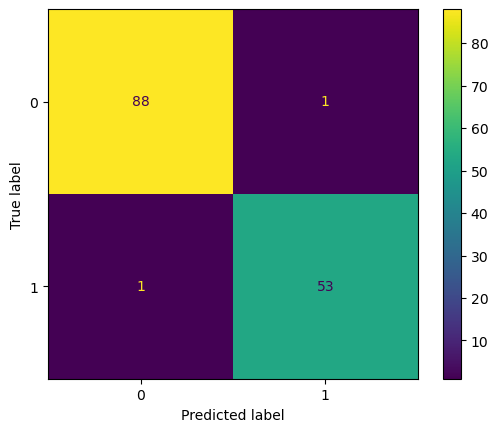

In [28]:
model_ann=KerasClassifier(build_fn=ann)
try:
    tuned_model(model_ann,params_ann)
except:
    print("error in model")

In [64]:
import shap

<AxesSubplot: >

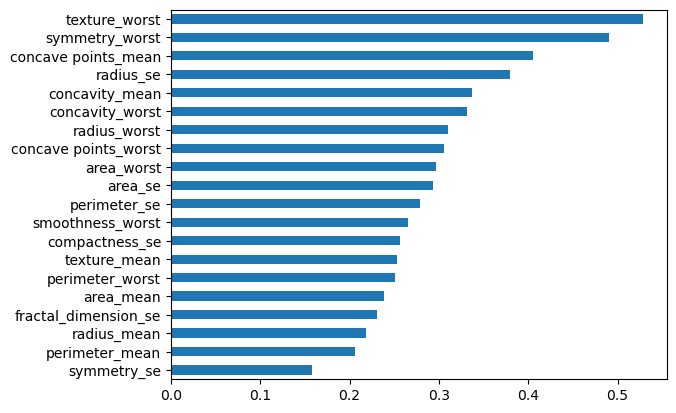

In [33]:
model =SVC(C= 0.1, kernel='linear')
model.fit(x_train,y_train)
pd.Series(abs(model.coef_[0]), index=features.columns).nlargest(20,keep='all').sort_values(ascending =True).plot(kind='barh')

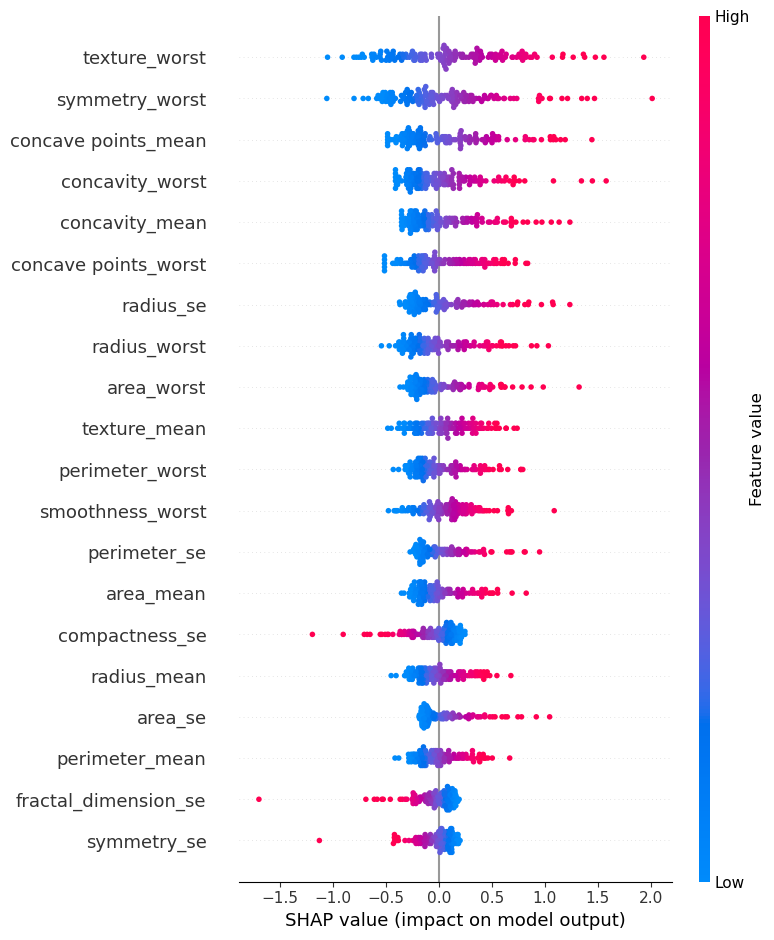

In [66]:
explainer = shap.Explainer(model,x_train)
xt= pd.DataFrame(x_test)
xt.columns=features.columns
shap.summary_plot(explainer(xt))

In [67]:
features.columns[23]


'area_worst'

In [68]:
ypred = model.predict(x_test)

In [69]:
#shap_values=explainer.shap_values(x_test)
a= pd.DataFrame(x_test)
a.columns=features.columns
k=y_test.reset_index(drop=True)
a["true"]=k
a["pred"]=model.predict(x_test)

In [70]:
z=a[a["true"]!=a["pred"]]

In [71]:
z.iloc[:,:32]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,true,pred
20,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,0.405774,...,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903,1,0
77,-0.047513,-0.521181,-0.022203,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,...,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489,1,0
114,-1.447987,-0.456023,-1.366651,-1.150124,0.728714,0.700428,2.814833,-0.133333,1.093024,2.503828,...,-1.243893,-0.977194,0.693984,1.159269,4.700669,0.919592,2.147190,1.859432,0,1


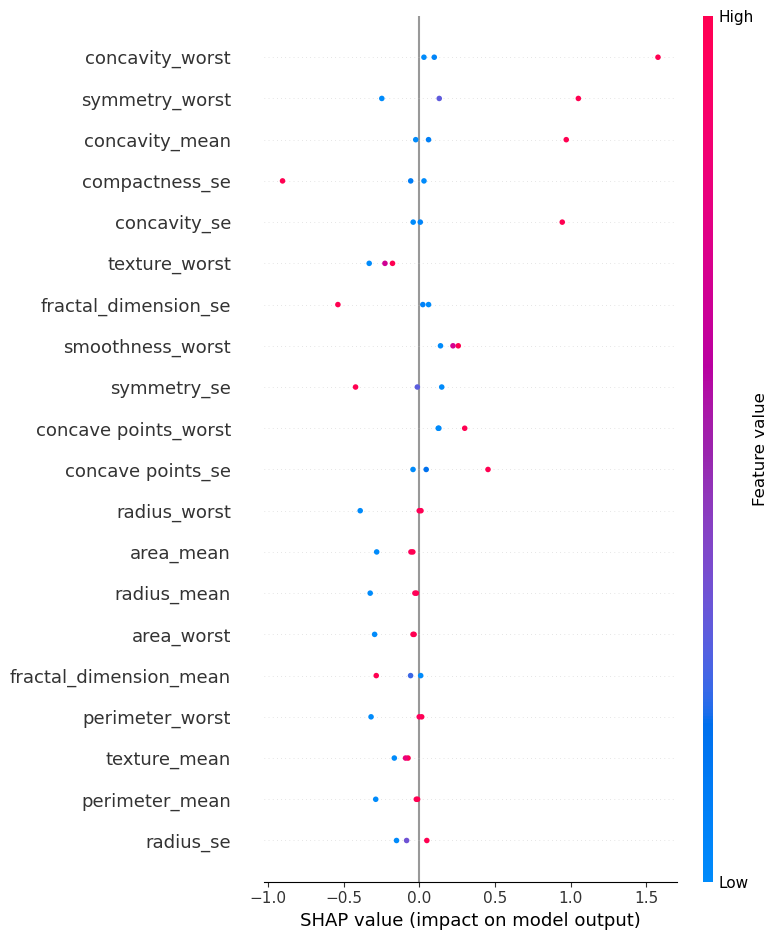

In [72]:
shap.summary_plot(explainer(z.iloc[0:4,:30]))

In [73]:
z["smoothness_worst"]

20     0.382749
77     0.825491
114    0.693984
Name: smoothness_worst, dtype: float64

In [74]:
aa=pd.DataFrame(features_std)
aa.columns=features.columns
aa.describe()["smoothness_worst"]


count    5.690000e+02
mean    -2.372638e-16
std      1.000880e+00
min     -2.682695e+00
25%     -6.912304e-01
50%     -4.684277e-02
75%      5.975448e-01
max      3.955374e+00
Name: smoothness_worst, dtype: float64

In [75]:
import threading 
import time

In [76]:
def model_metrics(model):
    y_pred = model.predict(x_test)
    #y_pred =np.argmax(y_pred)
    y_pred = np.where(y_pred>0.5,1,0)
   
    cm= confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    print("Prcecision,Recall, F1 =",precision_recall_fscore_support(y_test, y_pred,average="binary")[0:3])

x_train_smote,y_train_smote=sm.fit_resample(x_train,y_train)

def svm_model(a,b):
    start_time = time.time()
    m =SVC(C=0.1,kernel="linear")
    n=m.fit(a,b)
    model_metrics(n)
    t=(time.time() - start_time)
    return t
def log_model(a,b):
    start_time = time.time()
    m= LogisticRegression(solver="liblinear",C=1,penalty="l1")
    n= m.fit(a,b)
    model_metrics(n)
    t=(time.time() - start_time)
    return t
def dt_model(a,b):
    start_time = time.time()
    m =DecisionTreeClassifier(criterion= 'log_loss', max_depth= 100)
    n= m.fit(a,b)
    model_metrics(n)
    t=(time.time() - start_time)
    return t
def rf_model(a,b):
    start_time = time.time()
    m =RandomForestClassifier(criterion= 'entropy', max_depth= 100)
    n= m.fit(a,b)
    model_metrics(n)
    t=(time.time() - start_time)
    return t
def ann_m(a,b):
    start_time = time.time()
    model = Sequential()
    model.add(Dense(8, activation='relu', input_shape=(30,)))
    model.add(Dropout(0.1))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['acc'])
    model.fit(x_train, y_train,epochs=16, batch_size=1, verbose=1)
    model_metrics(model)
    t=(time.time() - start_time)
    return t

Prcecision,Recall, F1 = (0.9811320754716981, 0.9629629629629629, 0.9719626168224299)
Prcecision,Recall, F1 = (0.9636363636363636, 0.9814814814814815, 0.9724770642201834)
Prcecision,Recall, F1 = (0.9807692307692307, 0.9444444444444444, 0.9622641509433962)
Prcecision,Recall, F1 = (0.9615384615384616, 0.9259259259259259, 0.9433962264150944)
Epoch 1/16
426/426 [==============================] - 0s 325us/step - loss: 0.4385 - acc: 0.8028
Epoch 2/16
426/426 [==============================] - 0s 312us/step - loss: 0.2316 - acc: 0.9202
Epoch 3/16
426/426 [==============================] - 0s 312us/step - loss: 0.1726 - acc: 0.9390
Epoch 4/16
426/426 [==============================] - 0s 318us/step - loss: 0.1149 - acc: 0.9742
Epoch 5/16
426/426 [==============================] - 0s 321us/step - loss: 0.1038 - acc: 0.9648
Epoch 6/16
426/426 [==============================] - 0s 310us/step - loss: 0.1015 - acc: 0.9718
Epoch 7/16
426/426 [==============================] - 0s 312us/step - loss: 0.

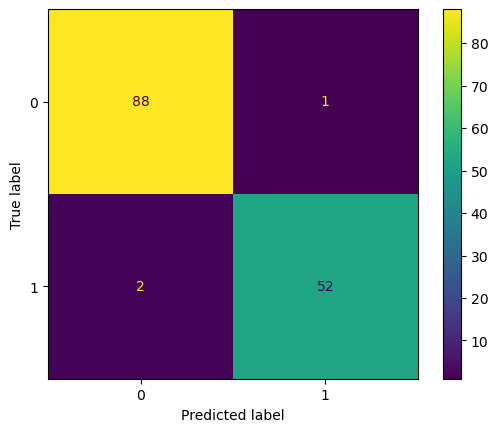

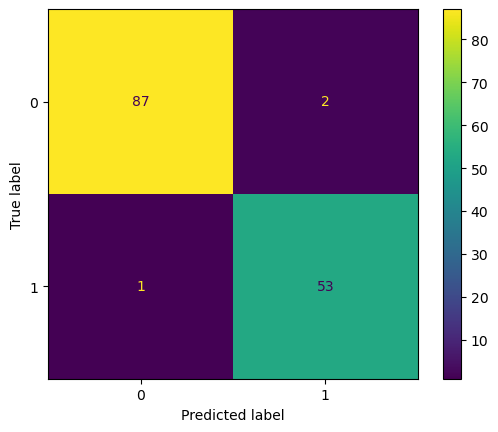

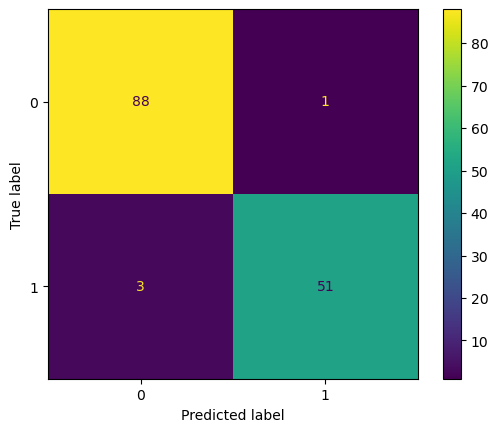

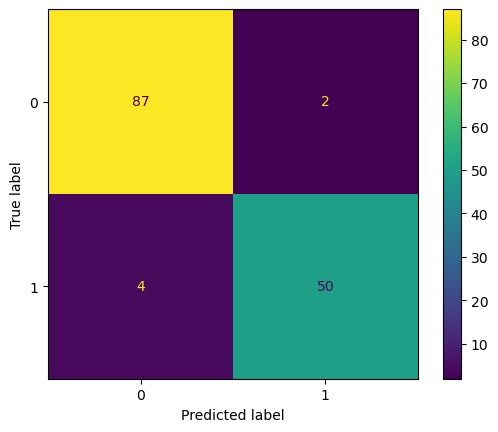

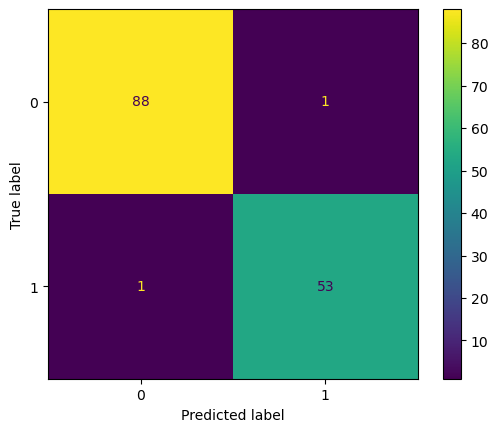

In [77]:
try:
    t1=svm_model(x_train,y_train)
    t2=log_model(x_train,y_train)
    t3=rf_model(x_train,y_train)
    t4=dt_model(x_train,y_train)
    t5=ann_m(x_train,y_train)
except:
  print("An exception occurred")

In [78]:
print("total training time when serialized:",t1+t2+t3+t4+t5)



total training time when serialized: 2.5970458984375


execution in parallel training: 0.0002639293670654297
Prcecision,Recall, F1 = (0.9636363636363636, 0.9814814814814815, 0.9724770642201834)
Prcecision,Recall, F1 = (0.9811320754716981, 0.9629629629629629, 0.9719626168224299)
Prcecision,Recall, F1 = (0.9615384615384616, 0.9259259259259259, 0.9433962264150944)
Epoch 1/16
 65/426 [===>..........................] - ETA: 0s - loss: 0.7017 - acc: 0.6154    

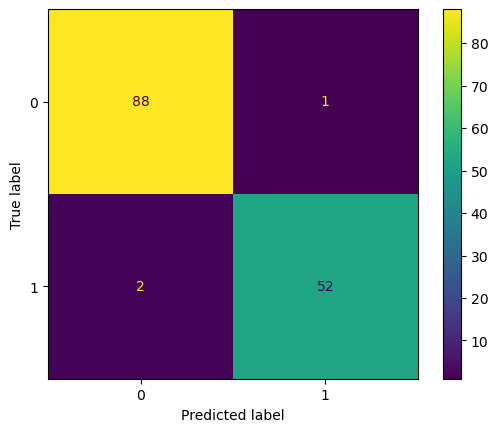

108/426 [======>.......................] - ETA: 0s - loss: 0.6380 - acc: 0.6852

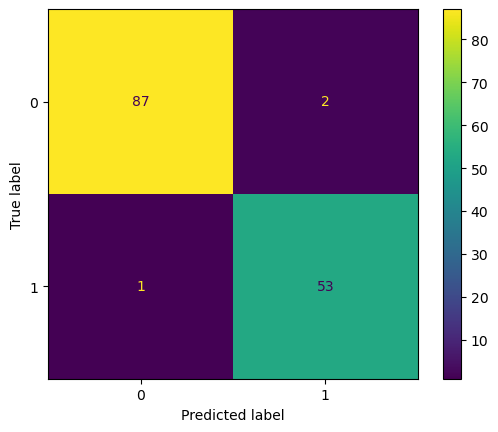

161/426 [==========>...................] - ETA: 0s - loss: 0.5822 - acc: 0.7516Prcecision,Recall, F1 = (0.9807692307692307, 0.9444444444444444, 0.9622641509433962)


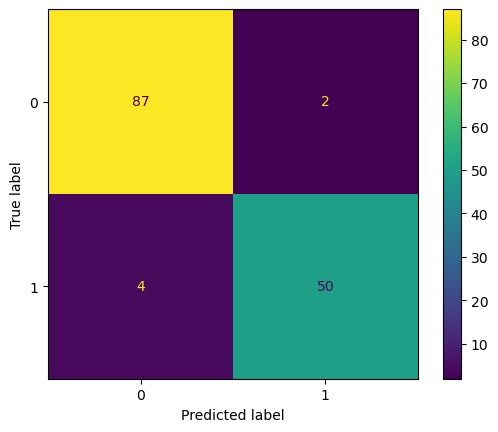

215/426 [==============>...............] - ETA: 0s - loss: 0.5272 - acc: 0.7953

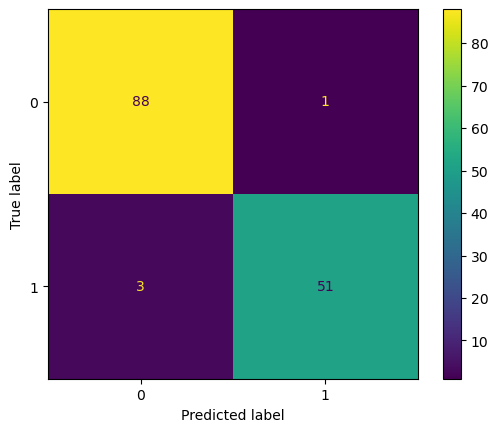

275/426 [==================>...........] - ETA: 0s - loss: 0.4842 - acc: 0.8145

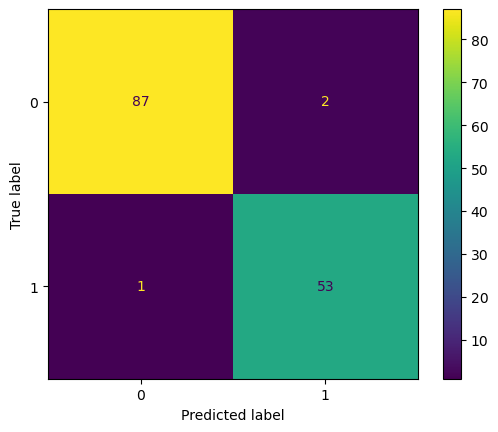

336/426 [======================>.......] - ETA: 0s - loss: 0.4562 - acc: 0.8304

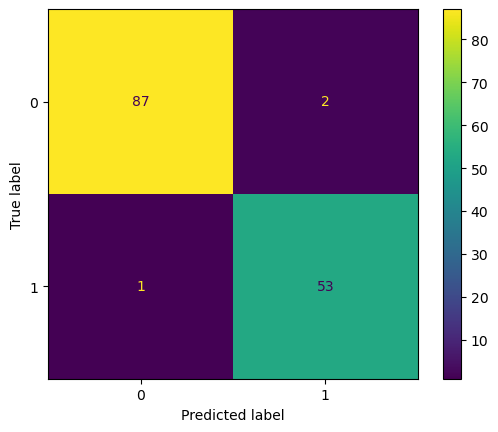

390/426 [==========================>...] - ETA: 0s - loss: 0.4290 - acc: 0.8385

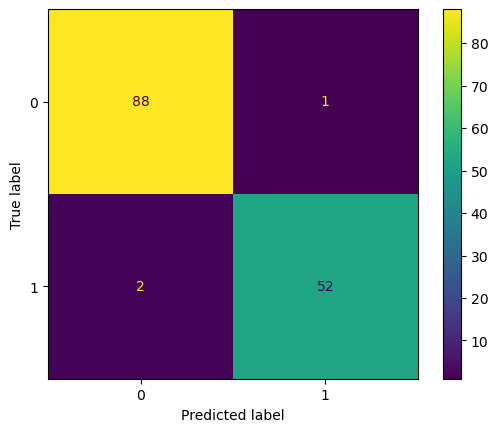

426/426 [==============================] - 1s 1ms/step - loss: 0.4223 - acc: 0.8380
Epoch 2/16
 27/426 [>.............................] - ETA: 0s - loss: 0.2168 - acc: 0.9630

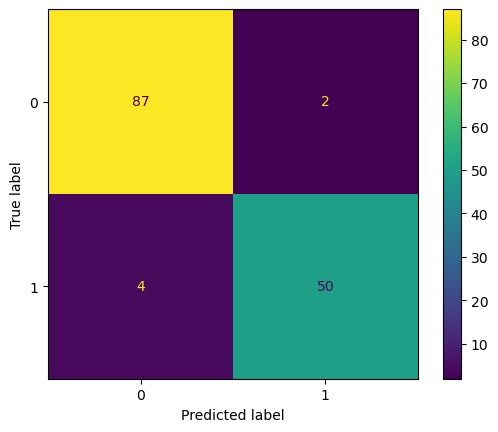

426/426 [==============================] - 0s 455us/step - loss: 0.2152 - acc: 0.9319
Epoch 3/16
426/426 [==============================] - 0s 317us/step - loss: 0.1617 - acc: 0.9366
Epoch 4/16
426/426 [==============================] - 0s 296us/step - loss: 0.1319 - acc: 0.9624
Epoch 5/16
426/426 [==============================] - 0s 307us/step - loss: 0.1080 - acc: 0.9648
Epoch 6/16
426/426 [==============================] - 0s 305us/step - loss: 0.0961 - acc: 0.9648
Epoch 7/16
426/426 [==============================] - 0s 291us/step - loss: 0.0881 - acc: 0.9695
Epoch 8/16
426/426 [==============================] - 0s 291us/step - loss: 0.0907 - acc: 0.9695
Epoch 9/16
426/426 [==============================] - 0s 292us/step - loss: 0.0723 - acc: 0.9789
Epoch 10/16
426/426 [==============================] - 0s 293us/step - loss: 0.0644 - acc: 0.9765
Epoch 11/16
426/426 [==============================] - 0s 299us/step - loss: 0.0707 - acc: 0.9789
Epoch 12/16
426/426 [==================

In [80]:
import _thread
start_time = time.time()
try:
    start_time = time.time()
    _thread.start_new_thread( svm_model, (x_train,y_train,) )
    _thread.start_new_thread( log_model, (x_train,y_train,) )
    _thread.start_new_thread( dt_model, (x_train,y_train,) )
    _thread.start_new_thread( rf_model, (x_train,y_train,) )
    _thread.start_new_thread( ann_m, (x_train,y_train,) )
    
except:
   print("Error: unable to start thread")
print("execution in parallel training:",(time.time() - start_time))